# Capstone: TMDB US Box Office Prediction
**_Author: Despina Daisy Matos_**

## Table of Contents: 
- [Libraries](#Libraries)
- [Data Cleaning](#Data-Cleaning)
    - [Reading In The Datasets](#Reading-In-The-Datasets)
    - [Dropping Unrelated Movies](#Dropping-Unrelated-Movies)
    - [Dropping Unrelated Features](#Dropping-Unrelated-Features)
    - [Dealing with Missing Values](#Dealing-with-Missing-Values)
    - [Fixing Datetime](#Fixing-Datetime)
    - [Extracting Data](#Extracting-Data)
    - [Creating Binary Features](#Creating-Binary-Features)
        - [Regulate `production_companies` Binary Features](#Regulate-production_companies-Binary-Features)
        - [Regulate `Keywords` Binary Features](#Regulate-Keywords-Binary-Features)
        - [Regulate `cast` Binary Features](#Regulate-cast-Binary-Features)
    - [Exporting Cleaned Dataset](#Exporting-Cleaned-Dataset)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Summary Statistics](#Summary-Statistics)
    - [Investigating Target Variable `revenue`](#Investigating-Target-Variable-revenue)
    - [Investigating Selected Univariate Distributions](#Investigating-Selected-Univariate-Distributions)
    - [Investigating Correlations](#Investigating-Correlations)
    - [Investigating Binary Features Frequencies](#Investigating-Binary-Features-Frequencies)
    - [Investigating Datetime Features](#Investigating-Datetime-Features)
    - [Outliers](#Outliers)
- [Preprocessing](#Preprocessing)
    - [Creating X features and y](#Creating-X-features-and-y)
    - [Train-test Split](#Train-test-Split)
    - [Determing the Baseline Scores](#Determing-the-Baseline-Scores)
- [Modeling](#Modeling)
    - [Linear Regression](#Linear-Regression)
    - [Ridge Regression](#Ridge-Regression)
    - [Lasso Regression](#Lasso-Regression)
    - [ElasticNet Regression](#ElasticNet-Regression)
    - [BaggingRegressor](#BaggingRegressor)
    - [RandomForestRegressor](#RandomForestRegressor)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)
- [Sources](#Sources)

## Libraries

[Back to Top](#Table-of-Contents:) 

Lets begin by importing our libraries that we will be working with throughout this Data Science Process.

In [1]:
# Working in the dataset
import pandas as pd

# Extracting features
import ast

# Scientific computing
import numpy as np

# Plotting for EDA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

# Model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

Now that we have loaded in our libraries, lets begin our Data Science Process by importing our datasets and then, shape it to answer our problem statement.

## Data Cleaning

[Back to Top](#Table-of-Contents:) 

We were able to obtain a movies dataset. It has 23 features including the target variable: `revenue`. We will begin our data cleaning by dropping all the movies that were not made in the United States because we want to shape our dataset to answer our problem statement. Then we will drop the unrelated features. Also, we will deal with missing values, fix the datetime feature, and extract data from specific features. Afterwards, we will create binary features for the categorical data. Finally, we will save our clean dataset for future use.

### Reading In The Datasets

[Back to Top](#Table-of-Contents:) 

Lets import in the dataset.

In [2]:
# Loading in the movies dataset
movies = pd.read_csv('./data/train.csv')
# Check to see if it worked
movies.head()

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                NaN   3300000   
3   4                                                NaN   1200000   
4   5                                                NaN         0   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt1380152                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                            overview  popularity  ...  \
0  When Lou, who has become the "father of the In...    6.575393  ...   
1  Mia Thermopolis is now a college graduate and ...    8.248895  ...   
2  Under the direction of a ruthless instructor, ...   64.299990  ...   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936  ...   
4  Marine Boy is the story of a former national s...    1.148070  ...   

  release_date runtime                                   spoken_languages  \
0      2/20/15    93.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1       8/6/04   113.0           [{'iso_639_1': 'en', 'name': 'English'}]   
2     10/10/14   105.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3       3/9/12   122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
4       2/5/09   118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]   

     status                                            tagline  \
0  Released  The Laws of Space and Time are About to be Vio...   
1  Released  It can take a lifetime to find true love; she'...   
2  Released    The road to greatness can take you to the edge.   
3  Released                                                NaN   
4  Released                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
4                                                NaN   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                crew   revenue  
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651  
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435  
2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000  
3  [{'credit_id': '52fe48779251

We were able to load in the movies dataset. We should now check the size of it to see what we are working with.

In [3]:
# Checking the shape
movies.shape

(3000, 23)

Again, the movies dataset has 23 features but each feature has 3,000 rows of movies. Also, the dataset has the target variable: `revenue`. 

We can now begin our data cleaning. We should first drop the unrelated movie rows.

### Dropping Unrelated Movies

[Back to Top](#Table-of-Contents:) 

We will be dropping unrelated movie rows that do not correlate with answering our problem statement. In other words, we will be able to select these rows by exploring the features in the movies dataset. Lets look at the features now.

In [4]:
# Checking the features in the dataset
movies.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

The first step to indicate if the movie was made in the United States is to look at the `original_language` feature. We will determine if the original language was English then we will consider these movies to be made in the United States. To understand the prefixes in this feature we will reference [Google Web Interface and Search Language Codes](https://sites.google.com/site/tomihasa/google-language-codes) to decode it.

In [5]:
# Checking the original_language values
movies.original_language.value_counts()

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
ko      20
cn      20
zh      19
de      18
ta      16
sv       8
nl       6
pt       6
da       5
fa       5
ro       4
hu       3
tr       3
ml       2
no       2
fi       2
pl       2
te       2
id       1
ar       1
mr       1
cs       1
ur       1
vi       1
he       1
nb       1
bn       1
el       1
sr       1
Name: original_language, dtype: int64

We were able to determine that movies in the `original_language` feature called 'en' are English language movies. Now, lets drop the movie rows that are not considered to be in English.

In [6]:
# Dropping any other langauage but 'en' in the dataset
movies = movies[movies.original_language == 'en']

We were able to drop these movies out of our dataset. The second step is look at the `production_countries` feature. We will be able to determine if a movie was made in the United States or another country.

In [7]:
# Checking the production_countries values
movies.production_countries.value_counts()

[{'iso_3166_1': 'US', 'name': 'United States of America'}]                                                                                                 1749
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]                                                  118
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]                                                                                                             93
[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]                                                           48
[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]                                                          47
                                                                                                                                                           ... 
[{'iso_3166_1': 'UA', 'name': 'Ukraine'}

We were able to determine which movie was made in the United States by looking at the 'US' value in the `production_countries` feature. Lets drop the movie rows that are not considered to be in the 'US'. First, we must extract the 'US' value from the `production_countries` feature. Then we can drop the unrelated movie rows.

In [8]:
# Reading the value as a dictionary instead of a string
# Collaborate with Noah C.
movies.production_countries = [value if type(value) == float else ast.literal_eval(value) for value in movies.production_countries]

In [9]:
# Filling in float NaN values with lists 
# Collaborate with Ethan H.
movies.production_countries = movies.production_countries.map(lambda x: [] if x is np.nan else x)

In [10]:
# Extract 'name' and append to an empty list
# Where the values go
values = []
# For item in the dataframe
for item in movies.production_countries:
    # Need whats inside the string
    output = ''
    # For key in item
    for key in item:
        # Add value to where values go
        output += key['iso_3166_1']
        # If have , then still add value
        output += ','
    # Getting all the values  
    output = output[:-1]
    # Add all values to values list
    values.append(output)

In [11]:
# Setting the production_countries to the 'names' list
movies.production_countries = values

# Check to see if it worked 
movies.production_countries.value_counts().head(20)

US          1749
GB,US        118
GB            93
CA,US         48
              48
DE,US         47
FR,US         27
AU,US         21
CA            18
AU            16
FR,GB         14
JP,US         13
DE,GB,US      12
US,GB         10
FR            10
IN             8
MX,US          7
US,CA          7
NZ,US          7
CA,DE,US       6
Name: production_countries, dtype: int64

In [12]:
# Dropping any other countries but 'US' in the dataset
# Source: pandas.Series.str.contains
movies.production_countries = movies.production_countries[movies.production_countries.str.contains("US")]

We were able to drop these movies out of our dataset. Lets check the shape of our dataset and reset the index. 

In [13]:
# Checking the shape
print(movies.shape)

# Resetting our index
movies = movies.reset_index(drop = True)

(2575, 23)


We now have 2,575 rows of movies that were created in the United States. We can use this data to answer our problem statement. Next, lets drop the unrelated features in the dataset.

### Dropping Unrelated Features

[Back to Top](#Table-of-Contents:) 

We will drop features that do not correlate with answering our problem statement. In other words, we will select these features by exploring each column and referencing to the [data dictionary](https://www.kaggle.com/c/tmdb-box-office-prediction/data). After selecting these features, we will drop these features from our dataset.

In [14]:
# Again checking the features in the dataset
movies.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In the dataset, we will drop the `id`, `belongs_to_collection`, `homepage`, `imdb_id`, `original_language`, `overview`, `poster_path`, `production_countries`, `spoken_languages` and `tagline` features. 

- We will drop the `id` feature because it is the row id for the dataset which is not very useful for us.
- We will drop the `belongs_to_collection` feature because not all of the movies in this dataset are in a franchise. 
- We will drop the `homepage` feature because it is the website to the movie's homepage which again is not very useful for us. 
- We will drop the `imdb_id` feature because it is the id for the [IMDB website](https://www.imdb.com/) which again is not very useful for us.
- We wil drop the `original_language` feature because we know that all the movies should be in English.
- We will drop the `overview` feature because it is the summary of the movie and we are producing a regression model not a natural language processing model. 
- We will drop the `poster_path` because we do not need images if we are doing a simple regression model. However, for next steps, we can include this by using a neural network. 
- We will drop the `production_countries` feature because we know that all the movies were created within the United States.
- We will drop the `spoken_languages` feature because we know that all the movies are spoken in English.
- We will drop the `tagline` feature because it states the famous movie lines from a particular movie and like the `overview` feature it will not be useful for our modeling. 

Lets drop these features now.

In [15]:
# Dropping unrelated features from the dataset
movies = movies.drop(columns = ['id',
                                'belongs_to_collection',
                                'homepage',
                                'imdb_id',
                                'original_language',
                                'overview',
                                'poster_path',
                                'spoken_languages',
                                'production_countries',
                                'tagline'])

# Check to see if it worked 
movies.columns

Index(['budget', 'genres', 'original_title', 'popularity',
       'production_companies', 'release_date', 'runtime', 'status', 'title',
       'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

We were able to dropped these selected features from the dataset. In our next part, we will check for missing values in the dataset and decide what to do with them.

### Dealing with Missing Values

[Back to Top](#Table-of-Contents:) 

Missing data is defined by values that are either NaN or nulls in the data. We will now check the dataset for these values.

In [16]:
# Checking for nulls in the dataset
movies.isnull().sum()

budget                    0
genres                    4
original_title            0
popularity                0
production_companies    119
release_date              0
runtime                   0
status                    0
title                     0
Keywords                183
cast                     13
crew                     15
revenue                   0
dtype: int64

There is missing data in the dataset. We decide to drop these null values because the data will not be effected in the slightest if these values will be dropped. To put it differently, our missing values is about 13 percent of our overall dataset, so dropping it will not make a difference. Lets drop it now. 

In [17]:
# Dropping the nulls in the movie dataset
movies = movies.dropna()

# Checking to see if it worked
movies.shape

(2308, 13)

We now have 2,308 rows of movies in the dataset. In our next part, we will fix the `release_date` feature as a datetime datatype in the dataset.

### Fixing Datetime

[Back to Top](#Table-of-Contents:) 

We will change the datatype of the `release_date` feature because it is a date in time. Also, we might want to explore this feature later on because our outside research suggested that it could be an important feature for our model. 

In [18]:
# Changing format into date object in dataset
movies.release_date = pd.to_datetime(movies.release_date)

# Check to see if it worked
movies.release_date.dtype

dtype('<M8[ns]')

We were able to change the datatype in the dataset. Now we can create new features such as `Month_release_date` and `Year_release_date` to add to the dataset. These new features will be interesting to explore later on for trends. 

In [19]:
# Creating our month feature
movies['Month_release_date'] = movies['release_date'].apply(lambda value: value.month)

# Creating our year feature
movies['Year_release_date'] = movies['release_date'].apply(lambda value: value.year)

# Lets check to see if it worked 
movies[['Month_release_date','Year_release_date']].head()

Month_release_date  Year_release_date
0                   2               2015
1                   8               2004
2                  10               2014
6                   2               1996
7                   4               2003

We were able to create these new features in the dataset. 

So in the dataset, 
- we dropped unrelated movies
- we dropped unrelated features 
- dealt with missing values 
- changed the datatime feature to the correct datatype and as a results, created two new features: `Month_release_date` and `Year_release_date`

We will now transition into our next section of the data cleaning: extracting data.

### Extracting Data

[Back to Top](#Table-of-Contents:) 

As we explored with the `production_countries` feature, we have features that are in dictionary format. In other words, these features have keys and values. Thus, some of these keys in these features will be helpful for answering our problem statement. The features that we will select to explore their dicitonaries are the `genres`, `production_companies`, `Keywords`, `crew`, and `cast` features. Once we get these keys, we will be able to add it into our dataset as features. Lets create helper functions that would extract the keys. 

First, we must change the strings into an original dictionary format. 

In [20]:
# Reading the value as a dictionary instead of a string
def change_from_str_to_dict(df):
    df = df.apply(ast.literal_eval) 
    return df

Then, we can extract the data.

In [21]:
# Extracting data from specific features' dictionaries
def extracting_data(df, value):
    # Where the values go
    values = []
    # For item in the dataframe
    for item in df:
        # Need whats inside the string
        output = ''
        # For key in item
        for key in item:
            # Add value to where values go
            output += key[value]
            # If have , then still add value
            output += ','
         # Getting all the values  
        output = output[:-1]
        # Add all values to values list
        values.append(output)
    return values

Lets extract the data by the sequence of features stated in the dataset. We will begin with the `genres` feature.

#### From `genres`

[Back to Top](#Table-of-Contents:) 

This feature is able to determine various forms of categories or classifications or groups of films.

In [22]:
# Check what the feature has
movies.genres[2]

"[{'id': 18, 'name': 'Drama'}]"

In the `genres` feature, we have two keys in this dictionary: `id` and `name`. We decided to keep the `name` key and reassign the `genres` feature as such. Lets extract the data now.

In [23]:
# Extracting the name key from genre feature
movies.genres = change_from_str_to_dict(movies.genres)
movies.genres = extracting_data(movies.genres, 'name') 

# Check to see if it worked
movies.genres.head()

0                                  Comedy
1             Comedy,Drama,Family,Romance
2                                   Drama
6    Action,Comedy,Music,Family,Adventure
7                            Comedy,Music
Name: genres, dtype: object

We were able to extract the `name` values in the `genres` feature in the dataset. Next, lets extract data from the `production_companies` feature.

#### From `production_companies`

[Back to Top](#Table-of-Contents:) 

This feature is able to determine who pays for a movie. 

In [24]:
# Check what the feature has
movies.production_companies[2]

"[{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]"

In the `production_companies` feature we have two keys in this dictionary: `name` and `id`. We decided to keep the `name` key and reassign the `production_companies` feature as such. Lets extract the data now.

In [25]:
# Extracting the name key from production_companies feature
movies.production_companies = change_from_str_to_dict(movies.production_companies)
movies.production_companies = extracting_data(movies.production_companies, 'name') 

# Check to see if it worked
movies.production_companies.head()

0    Paramount Pictures,United Artists,Metro-Goldwy...
1                                 Walt Disney Pictures
2    Bold Films,Blumhouse Productions,Right of Way ...
6    Walt Disney Pictures,Jim Henson Productions,Ji...
7                            Castle Rock Entertainment
Name: production_companies, dtype: object

We were able to extract the `name` values in the `production_companies` feature in the dataset.  Next, lets extract data from the `Keywords` feature.

#### From `Keywords`

[Back to Top](#Table-of-Contents:) 

This feature is able to determine what words are associate with a particular movie. 

In [26]:
# Check what the feature has
movies.Keywords[2]

"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]"

In the `Keywords` feature we have in this dictionary: `id` and `name`. We decided to the keep the `name` key and reassign the `Keywords` feature as such. Lets extract the data now.

In [27]:
# Extracting the name key from keywords feature
movies.Keywords = change_from_str_to_dict(movies.Keywords)
movies.Keywords = extracting_data(movies.Keywords, 'name') 

# Check to see if it worked
movies.Keywords.head()

0      time travel,sequel,hot tub,duringcreditsstinger
1             coronation,duty,marriage,falling in love
2    jazz,obsession,conservatory,music teacher,new ...
6              island,pirate gang,puppet,treasure hunt
7                             mockumentary,folk singer
Name: Keywords, dtype: object

We were able to extract the `name` values in the `Keywords` feature in the dataset. Next, lets extract data from the `crew` feature.

#### From `crew`

[Back to Top](#Table-of-Contents:) 

This feature is able to determine who works on a movie. 

In [28]:
# check what the feature has
movies.crew[1]

"[{'credit_id': '52fe43fe9251416c7502563d', 'department': 'Directing', 'gender': 2, 'id': 1201, 'job': 'Director', 'name': 'Garry Marshall', 'profile_path': '/kx77E8p5rnEmKxIhFT0qWCEMEik.jpg'}, {'credit_id': '52fe43fe9251416c75025667', 'department': 'Camera', 'gender': 2, 'id': 1214, 'job': 'Director of Photography', 'name': 'Charles Minsky', 'profile_path': None}, {'credit_id': '52fe43fe9251416c75025661', 'department': 'Sound', 'gender': 2, 'id': 4500, 'job': 'Original Music Composer', 'name': 'John Debney', 'profile_path': '/hTrlvZlDXQk49nfc2BM9sjKfJv.jpg'}, {'credit_id': '52fe43fe9251416c7502564f', 'department': 'Production', 'gender': 1, 'id': 8851, 'job': 'Producer', 'name': 'Whitney Houston', 'profile_path': '/69ouDnXnmklYPr4sMJXWKYz81AL.jpg'}, {'credit_id': '52fe43fe9251416c7502566d', 'department': 'Editing', 'gender': 0, 'id': 12970, 'job': 'Editor', 'name': 'Bruce Green', 'profile_path': '/yplxWPVgwK1b33AjvbhM9mWX2Aw.jpg'}, {'credit_id': '52fe43fe9251416c75025655', 'department

In the `crew` feature we have lots of keys in this dictionary. We decided to keep the `department` key. We will create a new feature called `crew_departments` and then use the `department` values to fill it in. Lets extract the data now. 

In [29]:
# Extracting the department key from crew feature
movies.crew = change_from_str_to_dict(movies.crew)
departments = extracting_data(movies.crew, 'department') 

# Creating new columns
movies['crew_departments'] = None

# Putting it in the dataset
movies.crew_departments = departments

# Check to see if it worked 
movies.crew_departments.head()

0    Directing,Directing,Writing,Writing,Production...
1    Directing,Camera,Sound,Production,Editing,Prod...
2    Production,Sound,Production,Costume & Make-Up,...
6    Directing,Production,Production,Writing,Writin...
7    Directing,Writing,Writing,Production,Camera,Ed...
Name: crew_departments, dtype: object

We were able to extract the `department` values in the `crew` feature in the dataset. Finally, lets drop the original `crew` feature from the dataset.

In [30]:
# Dropping original crew 
movies = movies.drop(columns = ['crew'])

# Check to see if it worked
movies.columns

Index(['budget', 'genres', 'original_title', 'popularity',
       'production_companies', 'release_date', 'runtime', 'status', 'title',
       'Keywords', 'cast', 'revenue', 'Month_release_date',
       'Year_release_date', 'crew_departments'],
      dtype='object')

We were able to dropped the original `crew` feature from the dataset. Lastly, lets extract data from the `cast` feature. 

#### From `cast`

[Back to Top](#Table-of-Contents:) 

This feature is able to determine the actors who worked in the movie. 

In [31]:
# check what the feature has
movies.cast[1]

'[{\'cast_id\': 1, \'character\': \'Mia Thermopolis\', \'credit_id\': \'52fe43fe9251416c7502561f\', \'gender\': 1, \'id\': 1813, \'name\': \'Anne Hathaway\', \'order\': 0, \'profile_path\': \'/jUMOKwSUBnTcMeN1HfhutiY49Ad.jpg\'}, {\'cast_id\': 2, \'character\': \'Queen Clarisse Renaldi\', \'credit_id\': \'52fe43fe9251416c75025623\', \'gender\': 1, \'id\': 5823, \'name\': \'Julie Andrews\', \'order\': 1, \'profile_path\': \'/6t61jkmfSA6nbYRCKR9s97CgUN6.jpg\'}, {\'cast_id\': 3, \'character\': \'Joe\', \'credit_id\': \'52fe43fe9251416c75025627\', \'gender\': 2, \'id\': 1210, \'name\': \'H√©ctor Elizondo\', \'order\': 2, \'profile_path\': \'/48UNfVFZVr0jyMIlLPhzm8IIM7f.jpg\'}, {\'cast_id\': 4, \'character\': \'Viscount Mabrey\', \'credit_id\': \'52fe43fe9251416c7502562b\', \'gender\': 2, \'id\': 655, \'name\': \'John Rhys-Davies\', \'order\': 3, \'profile_path\': \'/zZ67PuoFfik9QlZyfaEsFBC1yVJ.jpg\'}, {\'cast_id\': 5, \'character\': \'Lilly Moscovitz\', \'credit_id\': \'52fe43fe9251416c7502

In the `cast` feature we have lots of keys in this dictionary. We decided to the keep the `name` key and reassign the `cast` feature as such. Lets extract the data now.

In [32]:
# Extracting the name key from crew feature
movies.cast = change_from_str_to_dict(movies.cast)
movies.cast = extracting_data(movies.cast, 'name') 

# Check to see if it worked
movies.cast.head()

0    Rob Corddry,Craig Robinson,Clark Duke,Adam Sco...
1    Anne Hathaway,Julie Andrews,H√©ctor Elizondo,J...
2    Miles Teller,J.K. Simmons,Melissa Benoist,Aust...
6    Tim Curry,Kevin Bishop,Jennifer Saunders,Billy...
7    Bob Balaban,Christopher Guest,John Michael Hig...
Name: cast, dtype: object

We were able to extract the `name` values in the `cast` feature in the dataset. 

So in the dataset,
- we extracted data from the `genres` feature by using the `name` key to reassign the `genres` feature 
-  we extracted data from the `production_companies` feature by using the `name` key to reassign the `production_companies` feature
- we extracted data from the `Keywords` feature by using the `name` key to reassign the `Keywords` feature
- we extracted data from the `crew` feature by using the `department` key to create a new feature called `crew_departments`
- we extracted data from the `cast` feature by using the `name` key to reassign the `cast` feature

We will now transition into our next final section of the data cleaning: creating binary features.

### Creating Binary Features

[Back to Top](#Table-of-Contents:) 

We need every feature in the dataset to be in a numerical format to do our modeling, so we will dummy the selected features from the [extracting data section](#Extracting-Data) and the `status` feature. The `status` feature states if the movie was released or rumoured. Lets create a helper function for this task. 

In [33]:
# Creating binary features 
def get_binary_features(df):
    binary_features = pd.DataFrame(df.str.get_dummies(sep = ','))
    return binary_features

Now lets implement this function on our dataset, starting with the `genres` feature.

In [34]:
# Getting dummies for the genres feature
movies_genres_dummies = get_binary_features(movies.genres)
movies_genres_dummies.columns = [f'genre_{orig_column_name}' for orig_column_name in movies_genres_dummies]

# Check to see if it worked
movies_genres_dummies.columns

Index(['genre_Action', 'genre_Adventure', 'genre_Animation', 'genre_Comedy',
       'genre_Crime', 'genre_Documentary', 'genre_Drama', 'genre_Family',
       'genre_Fantasy', 'genre_Foreign', 'genre_History', 'genre_Horror',
       'genre_Music', 'genre_Mystery', 'genre_Romance',
       'genre_Science Fiction', 'genre_TV Movie', 'genre_Thriller',
       'genre_War', 'genre_Western'],
      dtype='object')

Lets do the same process for the `production_companies` feature.

In [35]:
# Getting dummies for the production_companies feature
movies_production_companies_dummies = get_binary_features(movies.production_companies)
movies_production_companies_dummies.columns = \
        [f'production_company_{orig_column_name}' for orig_column_name in movies_production_companies_dummies]

# Check to see if it worked
movies_production_companies_dummies.columns

Index(['production_company_ A', 'production_company_ A.I.E.',
       'production_company_ DPI', 'production_company_ Inc.',
       'production_company_ Television & Media', 'production_company_ The',
       'production_company_"DIA" Productions GmbH & Co. KG',
       'production_company_1019 Entertainment',
       'production_company_10th Hole Productions',
       'production_company_120dB Films',
       ...
       'production_company_iFeatures', 'production_company_icon',
       'production_company_id films', 'production_company_leo films',
       'production_company_picrow', 'production_company_platinum studios',
       'production_company_thinkfilm', 'production_company_uFilm',
       'production_company_warner bross Turkey',
       'production_company_Österreichischer Rundfunk (ORF)'],
      dtype='object', length=2833)

Lets do the same process for the `Keywords` feature.

In [36]:
# Getting dummies for the Keywords feature
movies_Keywords_dummies = get_binary_features(movies.Keywords)
movies_Keywords_dummies.columns = [f'Keyword_{orig_column_name}' for orig_column_name in movies_Keywords_dummies]

# Check to see if it worked
movies_Keywords_dummies.columns

Index(['Keyword_ co', 'Keyword_ new york city', 'Keyword_ pa',
       'Keyword_15th century', 'Keyword_17th century', 'Keyword_18th century',
       'Keyword_1910s', 'Keyword_1920s', 'Keyword_1930s', 'Keyword_1940s',
       ...
       'Keyword_zither', 'Keyword_zombie', 'Keyword_zombie apocalypse',
       'Keyword_zombification', 'Keyword_zoo', 'Keyword_zookeeper',
       'Keyword_ begins with text', 'Keyword_ flipping coin',
       'Keyword_ strange noise', 'Keyword_√òverste hylde'],
      dtype='object', length=6821)

Lets do the same process for the `crew_departments` feature.

In [37]:
# Getting dummies for the crew_departments feature
movies_crew_departments_dummies = get_binary_features(movies.crew_departments)
movies_crew_departments_dummies.columns = \
    [f'crew_department_{orig_column_name}' for orig_column_name in movies_crew_departments_dummies]

# Check to see if it worked
movies_crew_departments_dummies.columns

Index(['crew_department_Actors', 'crew_department_Art',
       'crew_department_Camera', 'crew_department_Costume & Make-Up',
       'crew_department_Crew', 'crew_department_Directing',
       'crew_department_Editing', 'crew_department_Lighting',
       'crew_department_Production', 'crew_department_Sound',
       'crew_department_Visual Effects', 'crew_department_Writing'],
      dtype='object')

Lets do the same process for the `cast` feature.

In [38]:
# Getting dummies for the cast feature
movies_cast_dummies = get_binary_features(movies.cast)
movies_cast_dummies.columns = [f'cast_{orig_column_name}' for orig_column_name in movies_cast_dummies]

# Check to see if it worked
movies_cast_dummies.columns

Index(['cast_ Jr.', 'cast_"Weird Al" Yankovic', 'cast_'Sister' Carol East',
       'cast_50 Cent', 'cast_A Martinez', 'cast_A. David Burleigh',
       'cast_A. J. Langer', 'cast_A. Jay Radcliff', 'cast_A. Michael Baldwin',
       'cast_A. P. Singh',
       ...
       'cast_–ú–æ—Ä—Ä–∏—Å –ß–µ—Å—Ç–Ω–∞—Ç', 'cast_–†–∞—à–∞–¥ –≠–≤–∞–Ω—Å',
       'cast_–≠—Ä–∏–∫–∞ –≠–ª–µ–Ω–∏–∞–∫', 'cast_√Älex Maruny',
       'cast_√Ålvaro Carca√±o', 'cast_√Ångel Salazar', 'cast_√Ångela Molina',
       'cast_√àve Salvail', 'cast_√ìlafur Darri √ìlafsson',
       'cast_√ìscar Jaenada'],
      dtype='object', length=32249)

Lastly, lets do the same process for the `status` feature.

In [39]:
# Getting dummies for the status feature
movies_status_dummies = get_binary_features(movies.status)
movies_status_dummies.columns = [f'status_{orig_column_name}' for orig_column_name in movies_status_dummies]

# Check to see if it worked
movies_status_dummies.columns

Index(['status_Released', 'status_Rumored'], dtype='object')

We were able to create these binary features to use with our dataset. 

Consequently, we will have too many features to use in the dataset now. In other words, our models will become severely underfit with these features. Thus, we need to regulate some of these dummy features before we model.

#### Regulate `production_companies` Binary Features

[Back to Top](#Table-of-Contents:) 

We will need to regulate the dummies for the `production_companies` feature because it creates too many dummies. So we need to decide how to work around that. We decide to create a small list of these production companies and use that list to customize the dummies in the dataset.

According to [Boom or Bust? Factors that Influence Box Office Revenue](https://medium.com/@nealsivadas/boom-or-bust-factors-that-influence-box-office-revenue-c8e4442d141f), the “big-six” film studios are Disney, 20th Century Fox, Warner Bros, NBCUniversal, Sony Pictures, and Paramount Pictures. Thus, this will be our small list. However, each film studio is an umbrella and actually owns a list of production companies. So, we will create six new features called `Disney_production_company`, `Twenty_Century_Fox_production_company`, `Warner_Bros_production_company`, `NBCUniversal_production_company`, `Sony_Pictures_production_company`, and `Paramount_Pictures_production_company` that will have the list of compaines each film studio owns. We will **manually** look through the movies_production_companies_dummies dataset to get these values for each film studio. 

For example, the `Disney_production_company` feature will consistent of 1 as a Disney own production company and 0 as not.

Lets create a helper function that would "dummy" each film studio with its list of production companies. 

In [40]:
# Dumming with a list of production companies
# Collaborate with Noah C.
def dummied_by_list(df, feature_list):
    return df[feature_list].sum(axis = 1)

We will now add these six features into our movies dataset with this fuction above. Note: because we are using the sum method to obtain these values, we will not get a "binary" format. The sum method is totaling each movie row, thus some totals will be 2, 3, or 4. These values, 2, 3, or 4, indicates that there are multiple production compainies in a particular movie. In sum, we will use 1, 2, 3, or 4 as our "1" for our dummy.

Using, the "big-six" list, we will be begin with Disney. To determine what production compaines Disney owns, we will be referencing this [EVERY COMPANY DISNEY OWNS: A MAP OF DISNEY'S WORLDWIDE ASSETS](https://www.titlemax.com/discovery-center/money-finance/companies-disney-owns-worldwide/). 

In [41]:
# From the movies_production_companies_dummies dataset we selected these disney own compaines 
disney_compaines = [
'production_company_ABC Motion Pictures', 
'production_company_ABC Pictures', 
'production_company_DisneyToon Studios', 
'production_company_Disneynature',
'production_company_Touchstone Pictures', 
'production_company_Marvel Enterprises', 
'production_company_Marvel Entertainment', 
'production_company_Marvel Knights',
'production_company_Marvel Productions', 
'production_company_Marvel Studios', 
'production_company_Lucasfilm', 
'production_company_Pixar Animation Studios'
]

In [42]:
# Getting the dummies variables for movies_production_companies_dummies by using the disney_compaines list
movies["Disney_production_company"] = dummied_by_list(movies_production_companies_dummies, 
                                                      disney_compaines)

# Lets check to see if it worked
movies["Disney_production_company"].value_counts()

0    2206
1     101
2       1
Name: Disney_production_company, dtype: int64

We created numerical values for `Disney_production_company` feature, however, it needs to be in a binary layout to be a "dummy" feature. Lets fixed that now. 

In [43]:
# Replacing 2 with 1 to keep to the binary format 
movies["Disney_production_company"].replace(2, 1, inplace = True)

# Check to see if it worked
movies["Disney_production_company"].value_counts()

0    2206
1     102
Name: Disney_production_company, dtype: int64

We were able to make a binary feature for the `Disney_production_company`. Lets now do the same process for the film studio Twenty Century Fox. 

To determine what production compaines Twenty Century Fox owns, we will be referencing this [List of assets owned by 21st Century Fox](https://en.wikipedia.org/wiki/List_of_assets_owned_by_21st_Century_Fox). 

In [44]:
# From the movies_production_companies_dummies dataset we selected these twenty century fox own compaines 
twenty_century_fox_compaines = [
'production_company_20th Century Fox Home Entertainment',
'production_company_20th Century Fox Television',
'production_company_Fox 2000 Pictures',
'production_company_Fox Animation Studios',
'production_company_Fox Atomic',
'production_company_Fox Family Films',
'production_company_Fox Film Corporation',
'production_company_Fox International Productions',
'production_company_Fox Searchlight Pictures',
'production_company_Regency Enterprises',
'production_company_New Regency Pictures',
]

In [45]:
# Getting the dummies variables for movies_production_companies_dummies by using the twenty_century_fox_compaines list
movies["Twenty_Century_Fox_production_company"] = dummied_by_list(movies_production_companies_dummies, 
                                                                  twenty_century_fox_compaines)

# Lets check to see if it worked
movies["Twenty_Century_Fox_production_company"].value_counts()

0    2220
1      66
2      21
3       1
Name: Twenty_Century_Fox_production_company, dtype: int64

We created numerical values for `Twenty_Century_Fox_production_company` feature, however, it needs to be in a binary layout. Lets fixed that now.

In [46]:
# Replacing 2 & 3 with 1 to keep to the binary format 
movies["Twenty_Century_Fox_production_company"].replace({2: 1, 
                                                         3: 1},
                                                         inplace = True)

# Check to see if it worked
movies["Twenty_Century_Fox_production_company"].value_counts()

0    2220
1      88
Name: Twenty_Century_Fox_production_company, dtype: int64

We were able to make a binary feature for the `Twenty_Century_Fox_production_company`. Lets now do the same process for the film studio Warner Bros. 

To determine what production compaines Warner Bros owns, we will be referencing this [List of assets owned by WarnerMedia](https://en.wikipedia.org/wiki/List_of_assets_owned_by_WarnerMedia).

In [47]:
# From the movies_production_companies_dummies dataset we selected these warner bros own compaines 
warner_bros_compaines = [
'production_company_HBO Films',
'production_company_HBO Pictures',
'production_company_HBO/Cinemax Documentary', 
'production_company_CinemaNX',
'production_company_Warner Animation Group',
'production_company_Warner Bros.',
'production_company_Warner Bros. Animation',
'production_company_Warner Bros. Family Entertainment',
'production_company_Warner Bros. Feature Animation',
'production_company_Warner Bros. Interactive Entertainment',
'production_company_Warner Bros. Pictures',
'production_company_Warner Brothers/Seven Arts',
'production_company_Warner Independent Pictures (WIP)',
'production_company_Warner Premiere', 
'production_company_New Line Cinema',
'production_company_New Line Productions',
'production_company_Alloy Entertainment',
'production_company_Turner Feature Animation',
'production_company_Turner Pictures',
'production_company_Castle Rock Entertainment',
'production_company_Bad Robot'
]

In [48]:
# Getting the dummies variables for moives_production_companies_dummies by using the warner_bros_compaines list
movies["Warner_Bros_production_company"] = dummied_by_list(movies_production_companies_dummies, 
                                                           warner_bros_compaines)

# Lets check to see if it worked
movies["Warner_Bros_production_company"].value_counts()

0    2010
1     280
2      16
3       2
Name: Warner_Bros_production_company, dtype: int64

We created numerical values for `Warner_Bros_production_company` feature, however, it needs to be in a binary layout. Lets fixed that now.

In [49]:
# Replacing 2 & 3 with 1 to keep to the binary format 
movies["Warner_Bros_production_company"].replace({2: 1, 
                                                  3: 1},
                                                  inplace = True)

# Check to see if it worked
movies["Warner_Bros_production_company"].value_counts()

0    2010
1     298
Name: Warner_Bros_production_company, dtype: int64

We were able to make a binary feature for the `Warner_Bros_production_company`. Lets now do the same process for the film studio NBCUniversal.

To determine what production compaines NBCUniversal owns, we will be referencing this [List of assets owned by NBCUniversal](https://en.wikipedia.org/wiki/List_of_assets_owned_by_NBCUniversal). 

In [50]:
# From the movies_production_companies_dummies dataset we selected these nbcuniversal own compaines 
nbcuniversal_compaines = [
'production_company_Universal Cartoon Studios',
'production_company_Universal City Studios',
'production_company_Universal International Pictures (UI)',
'production_company_Universal Pictures',
'production_company_Universal Pictures Corporation',
'production_company_Universal Pictures International (UPI)',
'production_company_Universal Studios',
'production_company_Universal TV',
'production_company_DreamWorks',
'production_company_DreamWorks Animation',
'production_company_DreamWorks Pictures',
'production_company_DreamWorks SKG',
'production_company_Focus Features',
'production_company_Focus Films',
'production_company_Amblin Entertainment',
'production_company_Carnival Films',
'production_company_Back Lot Pictures'
]

In [51]:
# Getting the dummies variables for movies_production_companies_dummies by using the nbcuniversal_compaines list
movies["NBCUniversal_production_company"] = dummied_by_list(movies_production_companies_dummies, 
                                                            nbcuniversal_compaines)

# Lets check to see if it worked
movies["NBCUniversal_production_company"].value_counts()

0    2049
1     232
2      27
Name: NBCUniversal_production_company, dtype: int64

We created numerical values for `NBCUniversal_production_company` feature, however, it needs to be in a binary layout. Lets fixed that now.

In [52]:
# Replacing 2 with 1 to keep to the binary format 
movies["NBCUniversal_production_company"].replace(2, 1, inplace = True)

# Check to see if it worked
movies["NBCUniversal_production_company"].value_counts()

0    2049
1     259
Name: NBCUniversal_production_company, dtype: int64

We were able to make a binary feature for the `NBCUniversal_production_company`. Lets now do the same process for the film studio Sony Pictures.

To determine what production compaines Sony Pictures owns, we will be referencing this [Sony Pictures Entertainment Motion Picture Group](https://en.wikipedia.org/wiki/Sony_Pictures_Entertainment_Motion_Picture_Group).

In [53]:
# From the movies_production_companies_dummies dataset we selected these sony pictures own compaines 
sony_pictures_compaines = [
'production_company_Columbia Pictures',
'production_company_Columbia Pictures Corporation',
'production_company_Columbia Pictures Industries',
'production_company_Sony Pictures',
'production_company_Sony Pictures Animation',
'production_company_Sony Pictures Classics',
'production_company_Sony Pictures Entertainment',
'production_company_Sony Pictures Entertainment (SPE)',
'production_company_Sony Pictures Home Entertainment',
'production_company_Sony Pictures Releasing',
'production_company_Sony Pictures Worldwide Acquisitions (SPWA)',
'production_company_Ghost House Pictures',
'production_company_Ghost Ship Films Pty. Ltd.',
'production_company_Happy Madison Productions',
'production_company_Lakeshore Entertainment',
'production_company_Lakeshore International',
'production_company_Marvel Enterprises',
'production_company_Marvel Entertainment',
'production_company_Marvel Knights',
'production_company_Marvel Productions',
'production_company_Marvel Studios',
'production_company_Original Film',
'production_company_Original Pictures',
'production_company_Point Grey Pictures',
'production_company_Overbrook Entertainment',
'production_company_Overbrook Films',
'production_company_Will Packer Productions',
'production_company_Village Roadshow Pictures',
'production_company_Apatow Productions',
'production_company_Cross Creek Pictures',
'production_company_Gracie Films'
]

In [54]:
# Getting the dummies variables for movies_production_companies_dummies by using the sony_pictures_compaines list
movies["Sony_Pictures_production_company"] = dummied_by_list(movies_production_companies_dummies, 
                                                             sony_pictures_compaines)

# Lets check to see if it worked
movies["Sony_Pictures_production_company"].value_counts()

0    2054
1     213
2      34
3       5
4       2
Name: Sony_Pictures_production_company, dtype: int64

We created numerical values for `Sony_Pictures_production_company` feature, however, it needs to be in a binary layout. Lets fixed that now.

In [55]:
# Replacing 2, 3 & 4 with 1 to keep to the binary format 
movies["Sony_Pictures_production_company"].replace({2: 1,
                                                    3: 1,
                                                    4: 1},
                                                    inplace = True)

# Check to see if it worked
movies["Sony_Pictures_production_company"].value_counts()

0    2054
1     254
Name: Sony_Pictures_production_company, dtype: int64

We were able to made a binary feature for the `Sony_Pictures_production_company`. Lastly, lets do the same process for the film studio Paramount Pictures.

To determine what production compaines Paramount Pictures owns, we will be referencing this [Paramount Pictures](https://www.wikiwand.com/en/Paramount_Pictures). 

In [56]:
# From the movies_production_companies_dummies dataset we selected these paramount pictures own compaines
paramount_pictures_compaines = [
'production_company_Paramount',
'production_company_Paramount Animation',
'production_company_Paramount Classics',
'production_company_Paramount Pictures',
'production_company_Paramount Vantage',
'production_company_Viacom Enterprises'
]

In [57]:
# Getting the dummies variables for movies_production_companies_dummies by using the paramount_pictures_compaines list
movies["Paramount_Pictures_production_company"] = dummied_by_list(movies_production_companies_dummies, 
                                                                  paramount_pictures_compaines)

# Lets check to see if it worked
movies["Paramount_Pictures_production_company"].value_counts()

0    2146
1     161
2       1
Name: Paramount_Pictures_production_company, dtype: int64

We created numerical values for `Paramount_Pictures_production_company` feature, however, it needs to be in a binary layout. Lets fixed that now.

In [58]:
# Replacing 2 with 1 to keep to the binary format 
movies["Paramount_Pictures_production_company"].replace(2, 1, inplace = True)

# Check to see if it worked
movies["Paramount_Pictures_production_company"].value_counts()

0    2146
1     162
Name: Paramount_Pictures_production_company, dtype: int64

We were able to make a binary feature for the `Paramount_Pictures_production_company`. Another feature that we need to regulate is the `Keywords` feature.

#### Regulate `Keywords` Binary Features

[Back to Top](#Table-of-Contents:) 

We also will need to regulate the dummies for the `Keywords` feature because it creates too many dummies. We also decide to create a small list of keywords, referencing this [Movie Keywords From The Numbers](https://www.the-numbers.com/movies/keywords#keyword_overview=od1), and use that list to customize the dummies. Therefore, we will create a new feature called `Top_twenty_keywords`. We do this by **manually** looking through the movie_Keywords_dummies dataset to get these values.

In [59]:
# From the movies_Keywords_dummies dataset we selected the top 20 keywords
top_twenty_keywords = [
'Keyword_romance',
'Keyword_dysfunctional family',
'Keyword_relationship problems',
'Keyword_voice over',
'Keyword_biography',
'Keyword_coming of age',
'Keyword_foreign',
'Keyword_lgbt',
'Keyword_revenge',
'Keyword_3d',
'Keyword_political',
'Keyword_surprise ending',
'Keyword_musician',
'Keyword_religious',
'Keyword_drug',
'Keyword_imax',
'Keyword_television',
'Keyword_animal',
'Keyword_addiction',
'Keyword_war',    
]

We will work through this dataset with the function above and add the `Top_twenty_keywords` feature to our movies dataset. Note: we will have the same results as above, some keywords will be in 2, 3, or 4 values. Remember this indicates that multiple keywords were in a particular movie.

In [60]:
# Getting the dummies variables for movies_Keywords_dummies by using the top_twenty_keywords list
movies["Top_twenty_keywords"] = dummied_by_list(movies_Keywords_dummies, 
                                                top_twenty_keywords)

# Lets check to see if it worked
movies["Top_twenty_keywords"].value_counts()

0    1990
1     304
2      14
Name: Top_twenty_keywords, dtype: int64

We created numerical values for `Top_twenty_keywords` feature, however, it needs to be in a binary layout. Lets fixed that now.

In [61]:
# Replacing 2 with 1 to keep to the binary format 
movies["Top_twenty_keywords"].replace(2, 1, inplace = True)

# Check to see if it worked
movies["Top_twenty_keywords"].value_counts()

0    1990
1     318
Name: Top_twenty_keywords, dtype: int64

We were able to make a binary feature for the `Top_twenty_keywords` in the dataset. Lastly, we need to regulate is the `cast` feature.

#### Regulate `cast` Binary Features

[Back to Top](#Table-of-Contents:) 

We also will need to regulate the dummies for the `cast` feature because it creates too many dummies. We also decide to create a small list of cast names, referencing this [Here Are The 20 Richest Actors In The World & Their Net Worth](https://moneyinc.com/richest-actors-in-the-world-in-2019/), and use that list to customize the dummies. Therefore, we will create a new feature called `Top_twenty_influential_actors`. We do this by **manually** looking through the movies_cast_dummies dataset to get these values.

In [62]:
# From the movies_cast_dummies dataset we selected the top 20 influential actors
top_twenty_actors = [
'cast_Jennifer Lopez',
'cast_Leonardo DiCaprio',
'cast_Robert Downey Jr.',
'cast_Brad Pitt',
'cast_Will Smith',
'cast_Jessica Alba',
'cast_Keanu Reeves',
'cast_Jackie Chan',
'cast_Clint Eastwood',
'cast_Arnold Schwarzenegger',
'cast_Sylvester Stallone',
'cast_Bill Cosby',
'cast_Jack Nicholson',
'cast_Adam Sandler',
'cast_Mel Gibson',
'cast_George Clooney',
'cast_Tom Cruise',
'cast_Tyler Perry',
'cast_Jerry Seinfeld',
'cast_Oprah Winfrey'
]

We will work through this dataset with the function above and add the `Top_twenty_influential_actors` feature to our movies dataset. Note: we will have the same results as above, some cast members will be in 2, 3, or 4 values. Remember this indicates that multiple cast members were in a particular movie.

In [63]:
# Getting the dummies variables for movies_cast_dummies by using the top_twenty_actors list
movies["Top_twenty_influential_actors"] = dummied_by_list(movies_cast_dummies, 
                                                          top_twenty_actors)

# Lets check to see if it worked
movies["Top_twenty_influential_actors"].value_counts()

0    2110
1     181
2      16
3       1
Name: Top_twenty_influential_actors, dtype: int64

We created numerical values for `Top_twenty_influential_actors` feature, however, it needs to be in a binary layout. Lets fixed that now.

In [64]:
# Replacing 2 & 3 with 1 to keep to the binary format 
movies["Top_twenty_influential_actors"].replace({2 : 1,
                                                 3 : 1}, 
                                                inplace = True)

# Check to see if it worked
movies["Top_twenty_influential_actors"].value_counts()

0    2110
1     198
Name: Top_twenty_influential_actors, dtype: int64

We were able to make a binary feature for the `Top_twenty_influential_actors` in the dataset. 

Now that we fixed these three binary features, `production_compaines`, `Keywords`, and `cast`, we can megre our other binary features into the movies dataset.

In [65]:
# Putting the other binary features into the dataset
movies = pd.concat([movies, 
                    movies_genres_dummies, 
                    movies_status_dummies,
                    movies_crew_departments_dummies], 
                    sort = False, 
                    axis = 1)
# Checking to see if it worked 
movies.shape

(2308, 57)

In [66]:
# Dropping original features 
movies = movies.drop(columns = ['genres',
                                'production_companies',
                                'Keywords',
                                'status',
                                'crew_departments',
                                'cast'])
# Check to see if it worked
movies.shape

(2308, 51)

Therefore, we were able to create binary features in the dataset.

So in the dataset,
- we created binary features from the `genres`,  `production_compaines`, `status`, `Keywords`, `crew_departments`, and `cast` features
- however, we regulated the `production_compaines`, `Keywords`, and `cast` features because it would of created too many dummy features
- as a result, we created eight new features: `Disney_production_company`, `Twenty_Century_Fox_production_company`, `Warner_Bros_production_company`, `NBCUniversal_production_company`, `Sony_Pictures_production_company`, `Paramount_Pictures_production_company`, `Top_twenty_keywords`, and `Top_twenty_influential_actors`

In sum, we were able to clean the movies dataset to have the appropriate features for modeling. Lets save this dataset for future use.

### Exporting Cleaned Dataset

[Back to Top](#Table-of-Contents:) 

Before we export, lets make all sure all of the feature titles have underscores as spaces and lowercase for readability in the dataset.

In [67]:
# Creating underscores between the spaces in the features' names
movies.columns = [name.replace(' ', '_') for name in movies.columns]

In [68]:
# Making the features' names in lower case form 
movies.columns = [name.lower() for name in movies.columns]

In [69]:
# Check to see if it worked
movies.columns

Index(['budget', 'original_title', 'popularity', 'release_date', 'runtime',
       'title', 'revenue', 'month_release_date', 'year_release_date',
       'disney_production_company', 'twenty_century_fox_production_company',
       'warner_bros_production_company', 'nbcuniversal_production_company',
       'sony_pictures_production_company',
       'paramount_pictures_production_company', 'top_twenty_keywords',
       'top_twenty_influential_actors', 'genre_action', 'genre_adventure',
       'genre_animation', 'genre_comedy', 'genre_crime', 'genre_documentary',
       'genre_drama', 'genre_family', 'genre_fantasy', 'genre_foreign',
       'genre_history', 'genre_horror', 'genre_music', 'genre_mystery',
       'genre_romance', 'genre_science_fiction', 'genre_tv_movie',
       'genre_thriller', 'genre_war', 'genre_western', 'status_released',
       'status_rumored', 'crew_department_actors', 'crew_department_art',
       'crew_department_camera', 'crew_department_costume_&_make-up',
     

We can now export our dataset.

In [70]:
# Here is what we will like to save it as
# Index = false for no index column
movies.to_csv('./data/cleaned_movies.csv', index = False)

We will now transition into our next section: exploratory data analysis.

## Exploratory Data Analysis

[Back to Top](#Table-of-Contents:) 

Exploratory data analysis (EDA) is an approach to analyzing the dataset to summarize it's main characteristics. We will begin by checking the summary statistics. Then, we will investigate the target variable `revenue` by exploring it's distribution. As a result from our summary statistics analysis, we will investigate the selected univariate distributions. Also, we will investigate the correlations from the selected features with the target variable and explore the binary features' frequency count. Then, we will investigate the datetime features to see if there are trends in time. Lastly, we will determine the outliers.

### Summary Statistics

[Back to Top](#Table-of-Contents:) 

In general, the summary statistics will provide information about the dataset. We will use the info and describe methods from the Pandas library to get our information.

In [71]:
# Looking at the basic info for the dataset
movies.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2308 entries, 0 to 2574
Columns: 51 entries, budget to crew_department_writing
dtypes: datetime64[ns](1), float64(2), int64(46), object(2)
memory usage: 1017.6+ KB


In the movies dataset, there are 2,308 rows of moives, 51 appropriate features, and 51 correct datatypes. Lets explore further by using the describe method.

In [72]:
# Generate descriptive statistics for the dataset
movies.describe()

budget   popularity      runtime       revenue  \
count  2.308000e+03  2308.000000  2308.000000  2.308000e+03   
mean   2.721527e+07     9.497948   107.799393  8.046061e+07   
std    3.975988e+07    11.890244    19.878654  1.488800e+08   
min    0.000000e+00     0.000578    40.000000  1.000000e+00   
25%    7.823775e+05     5.509981    95.000000  5.630135e+06   
50%    1.300000e+07     8.233775   104.000000  2.530771e+07   
75%    3.525000e+07    11.512809   117.000000  9.207478e+07   
max    3.800000e+08   287.253654   338.000000  1.519558e+09   

       month_release_date  year_release_date  disney_production_company  \
count         2308.000000        2308.000000                2308.000000   
mean             6.827990        2004.267331                   0.044194   
std              3.406355          16.464119                   0.205571   
min              1.000000        1970.000000                   0.000000   
25%              4.000000        1994.000000                   0.000000   
50%              7.000000        2005.000000                   0.000000   
75%             10.000000        2012.000000                   0.000000   
max             12.000000        2069.000000                   1.000000   

       twenty_century_fox_production_company  warner_bros_production_company  \
count                            2308.000000                     2308.000000   
mean                                0.038128                        0.129116   
std                                 0.191547                        0.335401   
min                                 0.000000                        0.000000   
25%                                 0.000000                        0.000000   
50%                                 0.000000                        0.000000   
75%                                 0.000000                        0.000000   
max                                 1.000000                        1.000000   

       nbcuniversal_production_company  ...  crew_department_camera  \
count                      2308.000000  ...             2308.000000   
mean                          0.112218  ...                0.817158   
std                           0.315703  ...                0.386621   
min                           0.000000  ...                0.000000   
25%                           0.000000  ...                1.000000   
50%                           0.000000  ...                1.000000   
75%                           0.000000  ...                1.000000   
max                           1.000000  ...                1.000000   

       crew_department_costume_&_make-up  crew_department_crew  \
count                        2308.000000           2308.000000   
mean                            0.594887              0.438475   
std                             0.491020              0.496308   
min                             0.000000              0.000000   
25%                             0.000000              0.000000   
50%                             1.000000              0.000000   
75%                             1.000000              1.000000   
max                             1.000000              1.000000   

       crew_department_directing  crew_department_editing  \
count                     2308.0              2308.000000   
mean                         1.0                 0.812392   
std                          0.0                 0.390484   
min                          1.0                 0.000000   
25%                          1.0                 1.000000   
50%                          1.0                 1.000000   
75%                          1.0                 1.000000   
max                          1.0                 1.000000   

       crew_department_lighting  crew_department_production  \
count               2308.000000                 2308.000000   
mean                   0.202340                    0.879116   
std                    0.401831                    0.326063   
min        

In the dataset, the values in the chart seem somewhat ordinary. Yet, in the `popularity` and `runtime` features the maximum values are strange. As a result, we will need to look further with visualizations to truly determine the irregularitites in the data.

Yet before we look at these irregularities, we will investigate our target variable `revenue`.

### Investigating Target Variable `revenue`

[Back to Top](#Table-of-Contents:) 

We need to understand how our target variable `revenue` behaves. Lets start with exploring it's summary statistics and then graph it's distribution.

In [73]:
# Summary statistics of target variable
movies['revenue'].describe()

count    2.308000e+03
mean     8.046061e+07
std      1.488800e+08
min      1.000000e+00
25%      5.630135e+06
50%      2.530771e+07
75%      9.207478e+07
max      1.519558e+09
Name: revenue, dtype: float64

It looks as though the data for the target variable is potentially skewed because the mean is greater than the median. Lets explore further with a distribution plot.

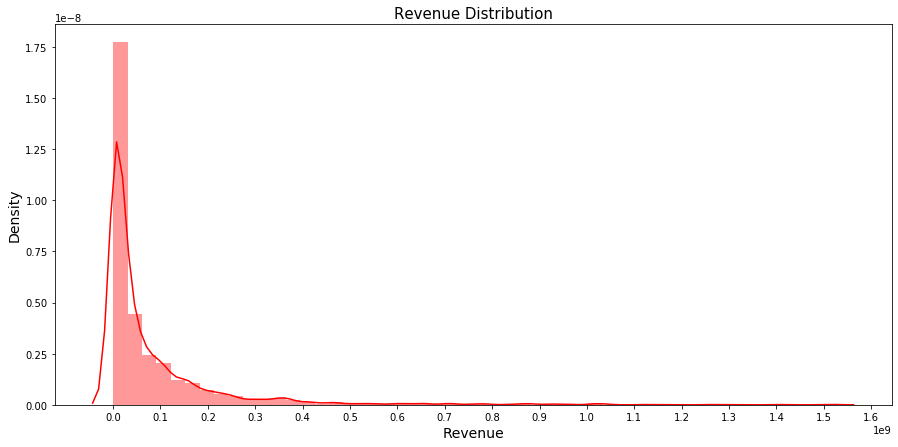

In [74]:
# Plot Revenue distribution
# Figure size 
plt.figure(figsize=(15,7)) 
# Plot
sns.distplot((movies['revenue']), 
             # Color of graph
             color = "red", 
             # Showing Line 
             kde = True)
# X label
plt.xlabel("Revenue", size = 14)
# X ticks
plt.xticks(np.arange(0, 1_700_000_000, 100_000_000))
# Y label
plt.ylabel("Density", size = 14)
# Title
plt.title("Revenue Distribution", size = 15);

Our insights were correct, the `revenue` distribution is highly right skewed. Ideally, we will want our target variable to be somewhat a normal distribution but this target variaible is not the case. For next steps, we can feature engineer the target variable towards a normal distribution. 

Next, lets reexamine the three original numerical features' distributions as an extension from our summary statistics analysis.

### Investigating Selected Univariate Distributions

[Back to Top](#Table-of-Contents:) 

We will investigate the distributions for the original numerical features: `budget`, `popularity`, and `runtime` because it is easier to see these distributions than our "created" numerical features. We will begin by plotting the `budget` feature's distribution.

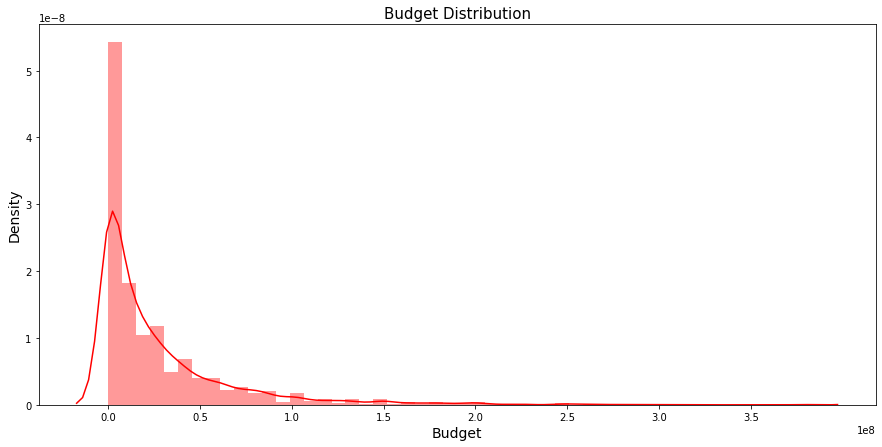

In [75]:
# Plot Budget distribution
# Figure size 
plt.figure(figsize=(15,7)) 
# Plot
sns.distplot((movies['budget']), 
             # Color of graph
             color = "red",
             # Showing line
             kde = True)
# X label
plt.xlabel("Budget", size = 14)
# X ticks
plt.xticks(np.arange(0, 380_000_000, 50_000_000))
# Y label
plt.ylabel("Density", size = 14)
# Title
plt.title("Budget Distribution", size = 15);

The `budget` feature has a highly right skewed distribution which means it has lots of outliers. However, it resembles like the target variable, thus, this will be a great feature for predicting `revenue`.

Next, lets check the `popularity` feature's distribution.

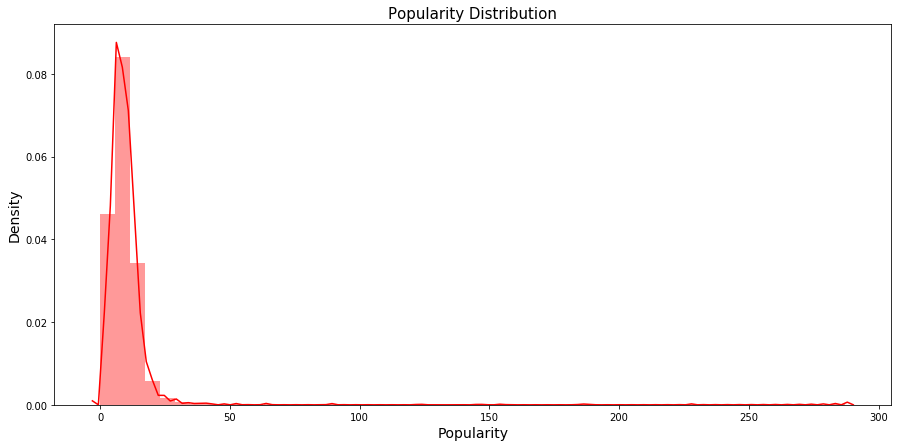

In [76]:
# Plot Popularity distribution
# Figure size
plt.figure(figsize=(15,7)) 
# Plot
sns.distplot((movies['popularity']),
             # Color of graph
             color = "red", 
             # Showing line
             kde = True)
# X label
plt.xlabel("Popularity", size = 14)
# Y label
plt.ylabel("Density", size = 14)
# Title
plt.title("Popularity Distribution", size = 15);

The `popularity` feature also has a highly right skewed distribution which also means it has lots of outliers. However, it also resembles like the target variable, thus, this will be a great feature for predicting `revenue`.

Lastly, lets check the `runtime` feature's distribution.

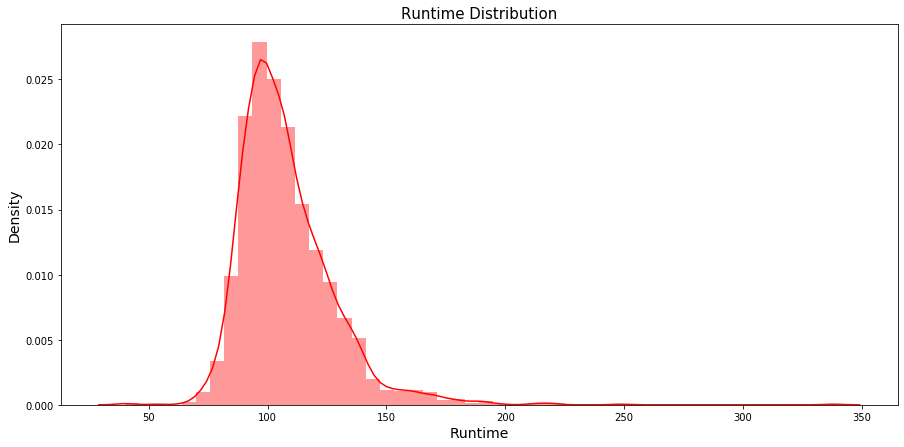

In [77]:
# Plot Runtime distribution
# Figure size 
plt.figure(figsize=(15,7)) 
# Plot
sns.distplot((movies['runtime']), 
             # Color of graph
             color = "red", 
             # Showing line
             kde = True)
# X label 
plt.xlabel("Runtime", size = 14)
# Y label
plt.ylabel("Density", size = 14)
# Title
plt.title("Runtime Distribution", size = 15);

The `runtime` feature has somewhat a normal distribution which means it has little outliers. However, it does not resemble like the target variable, thus, this seems unlikely that this will be a great feature for predicting `reveune`.

We can now investigate the correlations between our original numerical features and some selected engineered features.

### Investigating Correlations

[Back to Top](#Table-of-Contents:)

Lets determine the relationships between our features and the target variable, and the way we can do that is by exploring the correlations. We will be using a set of selected features because not all of the binary features are ideal to see visually. Thus, the features that we will be exploring are the `budget`, `popularity`, `runtime`, `disney_production_company`, `twenty_century_fox_production_company`, `warner_bros_production_company`, `nbcuniversal_production_company`, `sony_pictures_production_company`, `paramount_pictures_production_company`, `top_twenty_keywords`, and `top_twenty_influential_actors` features with our target variable `revenue`. Lets create a subset dataset with this list called selected features. 

In [78]:
# Creating the subset dataset
selected_features = movies[['budget', 
                            'popularity', 
                            'runtime', 
                            'disney_production_company', 
                            'twenty_century_fox_production_company', 
                            'warner_bros_production_company', 
                            'nbcuniversal_production_company',
                            'sony_pictures_production_company', 
                            'paramount_pictures_production_company', 
                            'top_twenty_keywords', 
                            'top_twenty_influential_actors',
                            'revenue']]

We will begin by focusing on the overall correlation by using a heatmap. 

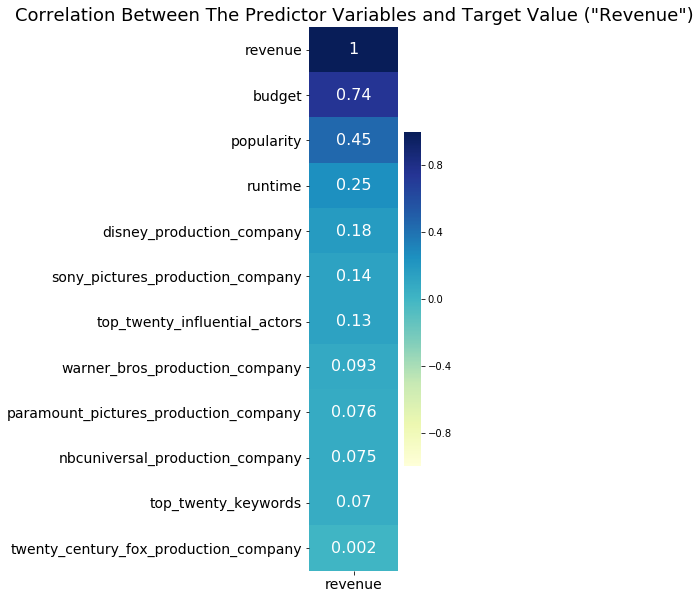

In [79]:
# Heatmap 
# Figure size
plt.figure(figsize=(2,10)) 
# Title
plt.title('Correlation Between The Predictor Variables and Target Value ("Revenue")', fontsize = 18) 
# Plot
sns.heatmap(selected_features.corr()[['revenue']].sort_values('revenue', 
                                                              # With respect to revenue sort values of corr 
                                                               ascending = False), 
                                                              # Show all of the numeric columns in the graph
                                                               annot = True, 
                                                              # Color of graph
                                                               cmap = "YlGnBu", 
                                                              # Correlation min value
                                                               vmin = -1,
                                                              # Correlation max value 
                                                               vmax = 1, 
                                                              # Numbers on graph size
                                                               annot_kws = {'fontsize':16}) 
# Control the size of x axis label
plt.xticks(fontsize = 14) 
# Control the size of y axis label
plt.yticks(fontsize = 14); 

In this heat map, we can notice where the correlation lies between the `revenue` and the individual features. We decided that the feature that correlates closer to one will be the best feature in our model and this is the `budget` feature. This is reasonable because production companies that spend great amounts of money to advertise their movies will gain attraction and in effect, the public will spend money on their movies. Also, if we look back at our outside research, budget was an important predictor feature. In addition, the distribution is similar to the target variable.

The list that follows is `popularity`, `runtime`, `disney_production_company`, `sony_pictures_production_company`, `top_twenty_influential_actors`, `warner_bros_production_company`, `paramount_pictures_production_company`, `nbcuniversal_production_company`, `top_twenty_keywords` and `twenty_century_fox_production_company`. 

In addition, we should denote that the `disney_production_company` feature is the highest correlated production company feature. This is reasonable because Dinsey has been getting a lot of traction recently with their Marvel and Star Wars films. In effect, the public loves these films so thats why they will gain a lot of revenue. 

Lastly, we should denote that the `twenty_century_fox_production_company` feature might not be a good predictor feature because it has the lowest correlation to the target varaible. This is reasonable because Twenty Century Fox has only produced 88 movies in this dataset. 

To fully explore the irregularities in these selected features, we will explore individually these selected features' correlations. We will begin by plotting the `budget` feature.

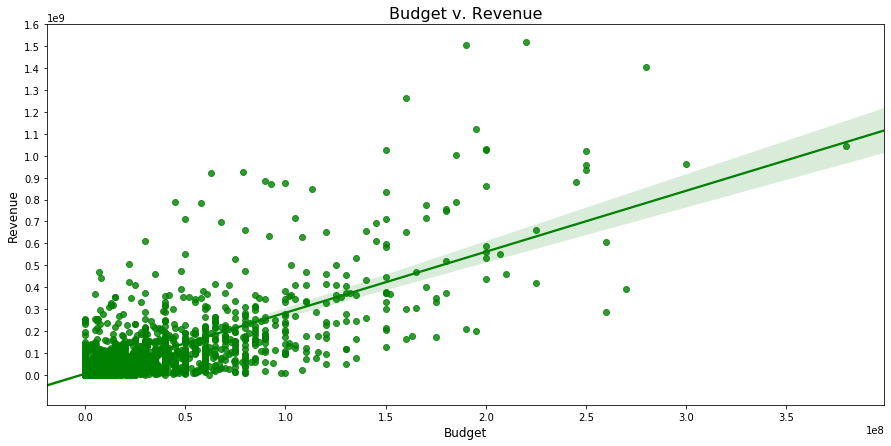

In [80]:
# Budget v. Revenue
# Figure size
plt.figure(figsize=(15,7))
# Plot
sns.regplot(movies['budget'], 
            movies['revenue'],
            # Color of graph
            color = 'green') 
# Title
plt.title('Budget v. Revenue', fontsize = 16) 
# X label
plt.xlabel('Budget', fontsize = 12)
# X ticks
plt.xticks(np.arange(0, 380_000_000, 50_000_000))
# Y label
plt.ylabel('Revenue', fontsize = 12)
# Y ticks
plt.yticks(np.arange(0, 1_700_000_000, 100_000_000));

- We observe that there is a high concentration with low budget films in the dataset. This is reasonable because businesses like production companies will like to spend as little as they can to gain a great profit.  
- Also, there is a positive correlation between the `budget` feature and `revenue`.
- However, the feature's trendline is swayed because of the outliers in this feature. 
- There is about 16 outliers after the movie budget hits 200 million dollars, which is around the average budget amount.  
- The most expensive movie to make in this dataset is Pirates of the Caribbean: On Stranger Tides which is about 380 million dollars. According to [Fourth Pirates Of The Caribbean Is Most Expensive Movie Ever With Costs Of 410 Million Dollars](https://www.forbes.com/sites/csylt/2014/07/22/fourth-pirates-of-the-caribbean-is-most-expensive-movie-ever-with-costs-of-410-million/#5072a4eb364f), it states, "One of the biggest costs of making On Stranger Tides was paying the production staff and actors with Mr Depp alone believed to have received 55 million dollars for the movie."
- As a result, the outliers assists the correlation to have a strong correlation with the target variable.

Next, lets check the `popularity` feature's correlation.

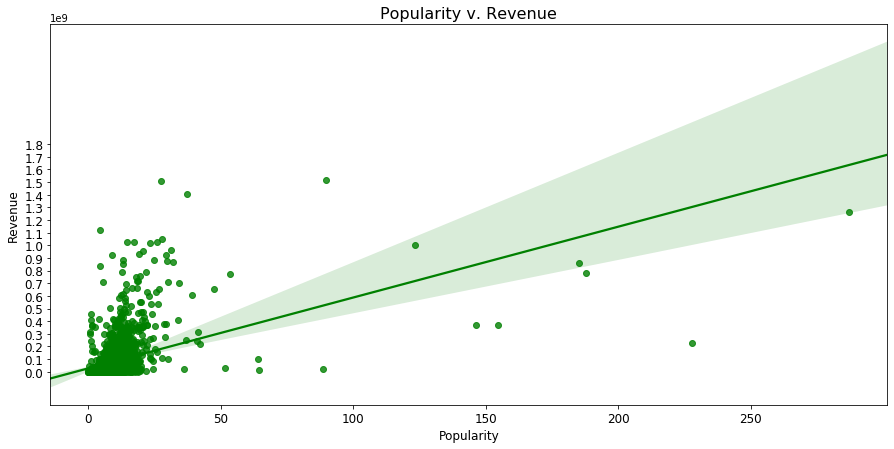

In [81]:
# Popularity v. Revenue
# Figure size
plt.figure(figsize=(15,7))
# Plot
sns.regplot(movies['popularity'], 
            movies['revenue'],
            # Color of graph
            color = 'g') 
# Title
plt.title('Popularity v. Revenue', fontsize = 16) 
# X label
plt.xlabel('Popularity', fontsize = 12)
# X ticks
plt.xticks(np.arange(0, 300, 50))
# Y label
plt.ylabel('Revenue', fontsize = 12)
# Y ticks
plt.yticks(np.arange(0, 1_900_000_000, 100_000_000))
# Tick size
plt.tick_params(labelsize = 12);

- We also observe that there is a high concentration with low popularity films in the dataset. This is reasonable because the popularity scale is subjective. Anybody in society can vote for a film on the movies database website. Thus, there are no regulations to follow as one votes for a movie. 
- As a result, there is a "cluster" like relationship between the `budget` feature and `revenue`.
- However, the feature's trendline is also swayed because of the outliers in this feature. 
- There is about 8 outliers after the movie's 100 percent popularity; which the scale should only be out of 100 percent.
- The most popular movie in this dataset is Wonder Woman which is about 294%. According to [Why Wonder Woman Is The Best DCEU Movie So Far](https://www.cinemablend.com/news/1666420/why-wonder-woman-is-the-best-dceu-movie-so-far), it states, "Wonder Woman still sets a new level of expectation for this franchise, and we hope that it's one that Justice League, Aquaman and all future DC Extended Universe blockbusters are able to either live up to or exceed." One can now assume why it got such praise.
- So the outliers also assists the correlation to have a strong correlation with the target variable.

Next, lets check the `runtime` feature's correlation.

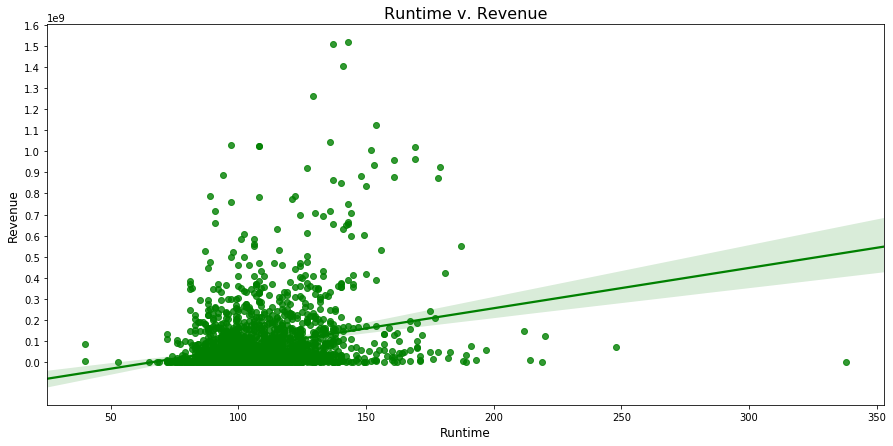

In [82]:
# Runtime v. Revenue
# Figure size 
plt.figure(figsize=(15,7))
# Plot
sns.regplot(movies['runtime'], 
            movies['revenue'],
            # Color of graph
            color = 'g') 
# Title
plt.title('Runtime v. Revenue', fontsize = 16) 
# X label
plt.xlabel('Runtime', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12)
# Y ticks
plt.yticks(np.arange(0, 1_700_000_000, 100_000_000));

- We also observe that there is a high concentration between two sets of runtimes in the dataset. This is reasonable because this range is centered around the [average movie length](https://www.google.com/search?q=the+average+movie+length&rlz=1C5CHFA_enUS877US877&oq=the+average+movie&aqs=chrome.1.69i57j0l7.7070j0j7&sourceid=chrome&ie=UTF-8) which is about 96.5 minutes.
- As a result, there is a "cluster" like relationship between the `runtime` feature and `revenue`.
- However, the feature's trendline is also swayed because of this "cluster". 
- Therefore, this feature has a weak positive correlation with the target variable and so it will not be consider as a feature in our modeling.

Next, lets check the `top_twenty_influential_actors` feature's correlation.

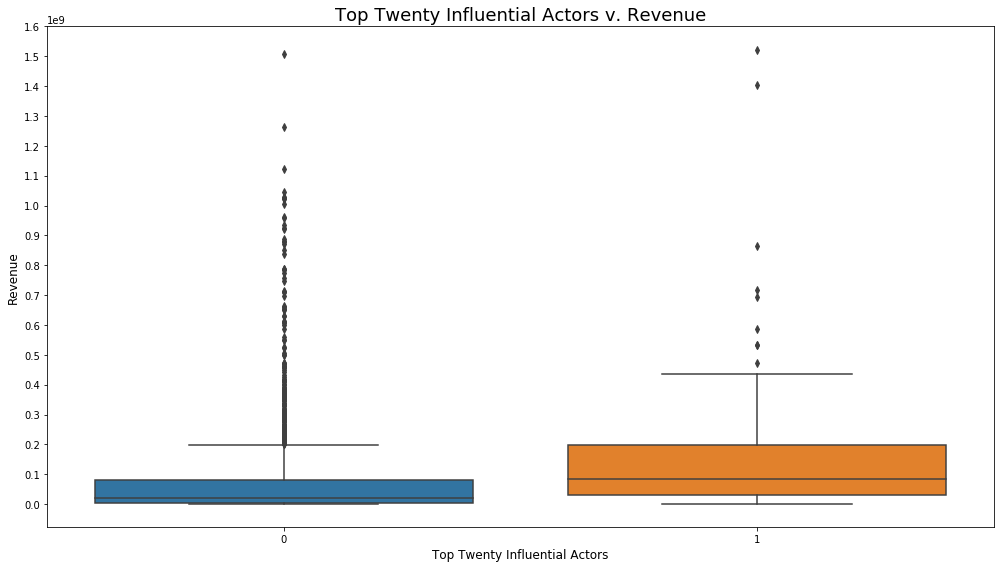

In [83]:
# top_twenty_influential_actors v. Revenue
# Figure size 
plt.figure(figsize=(14,8)) 
# Title
plt.title("Top Twenty Influential Actors v. Revenue", fontsize = 18)
# Plot
sns.boxplot(movies['top_twenty_influential_actors'], 
            movies['revenue'])
# X label
plt.xlabel('Top Twenty Influential Actors', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12)
# Y ticks
plt.yticks(np.arange(0, 1_700_000_000, 100_000_000))
# Tight layout
plt.tight_layout();

- There are two values in the `top_twenty_influential_actors` feature. 1 is the top twenty influential actors and 0 is not. There is clearly more actors that are not in this list that we created in the dataset. However, we will be focusing on the 1's correlation with revenue. 
- For 1, there is a right skewed distribution when compared to the target variable. 
- As a results, top influential actors do not necessarily make movies a lot of revenue.
- However, there are outliers in this feature that do not follow that trend. According to [Best Business Decisions Made by Actors](https://www.investopedia.com/financial-edge/0912/actors-who-got-a-share-of-film-profits.aspx), it states, "In order to capitalize on the wealth and status they've already achieved, some actors have become entrepreneurial by starting media businesses, production companies, and brands. As a result of their savvy business decisions, these actors have been able to exercise more creative control over their projects and earn greater returns for their contributions." In other words, influential actors who have more creative freedom are able to make their movies a lot of revenue. For instance, the movie Avengers: Age of Ultron made about 140,540,3694 dollars and the cast included Robert Downey Jr. He had more of a [creative freedom](https://www.newyorker.com/culture/cultural-comment/advice-for-robert-downey-jr-avengers-ultron-cultural-genocide) in this movie than the other movies he was in. 
- Also the outliers are pushing the skew, thus, this feature is a good predictor for the target variable because it is simlar to the `revenue` distribution. 

Next, lets check the `top_twenty_keywords` feature's correlation.

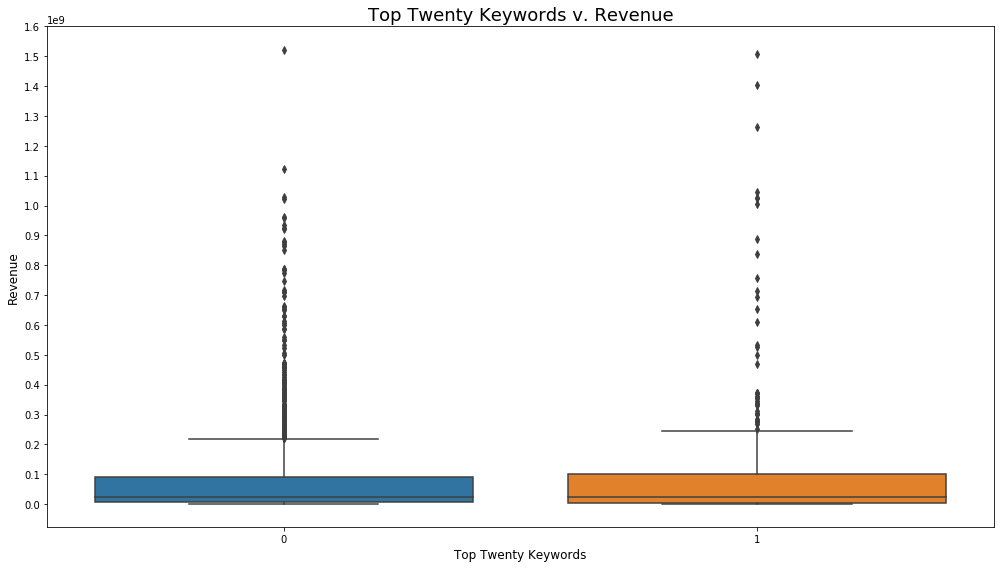

In [84]:
# top_twenty_keywords v. Revenue
# Figure size 
plt.figure(figsize=(14,8)) 
# Title
plt.title("Top Twenty Keywords v. Revenue", fontsize = 18)
# Plot
sns.boxplot(movies['top_twenty_keywords'], 
            movies['revenue'])
# X label
plt.xlabel('Top Twenty Keywords', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12)
# Y ticks
plt.yticks(np.arange(0, 1_700_000_000, 100_000_000))
# Tight layout
plt.tight_layout();

- Also there are two values in the `top_twenty_keywords` feature. 1 is the top twenty keywords and 0 is not. There is clearly more nonkeywords in the dataset. However, we will be focusing on the 1's correlation with revenue. 
- For 1, there is also a right skewed distribution when compared to the target variable. 
- As a results, also top twenty keywords do not necessarily make movies a lot of revenue. 
- However, there are outliers in this feature that do not follow that trend. According to [Quantitative analysis of the evolution of novelty in cinema through crowdsourced keywords](https://www.nature.com/articles/srep02758), it states, "Plot-keywords are thus qualitative descriptors spanning several scales of detail and specificity and they potentially constitute a rich information set capable of yielding valuable insights into the evolution of films over time." In other words, specific keywords are able to make their movies a lot of revenue. For instance, the movie American Beauty made about 356,296,601 dollars and the keyword associated with that movie was 'drug'. Therefore, keywords really reflect on the public trends. 
- Also the outliers are pushing the skewed, thus, this feature is a good predictor for the target variable because it is simlar to the `revenue` distribution. 

Next, lets check the `disney_production_company` feature's correlation.

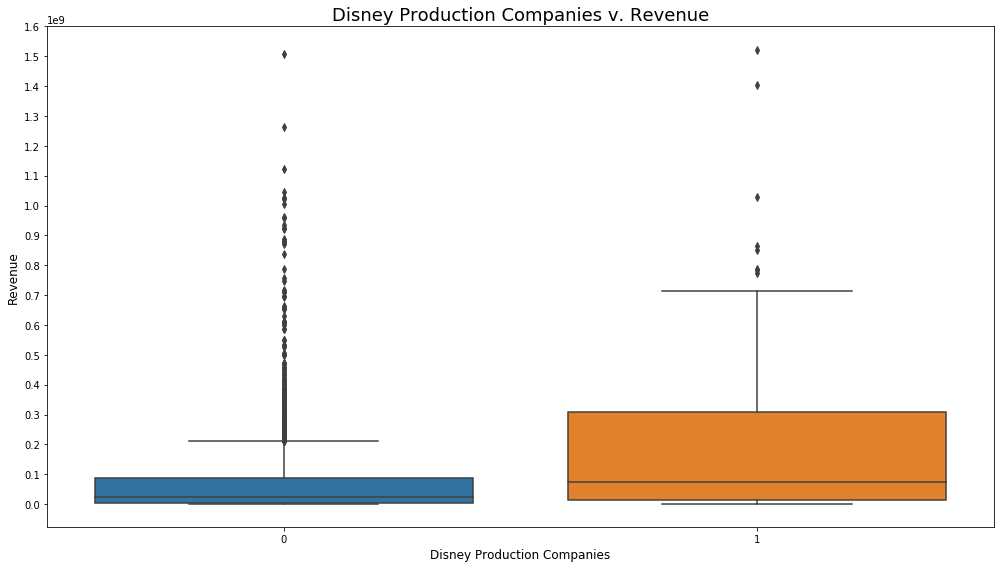

In [85]:
# disney_production_company v. Revenue
# Figure size 
plt.figure(figsize=(14,8)) 
# Title
plt.title("Disney Production Companies v. Revenue", fontsize = 18)
# Plot
sns.boxplot(movies['disney_production_company'], 
            movies['revenue'])
# X label
plt.xlabel('Disney Production Companies', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12)
# Y ticks
plt.yticks(np.arange(0, 1_700_000_000, 100_000_000))
# Tight layout
plt.tight_layout();

- Also there are two values in the `disney_production_company` feature. 1 is the Disney own compaines and 0 is not. There is clearly more nondisney own compaines in the dataset. However, we will be focusing on the 1's correlation with revenue. 
- For 1, there is also a right skewed distribution when compared to the target variable. 
- As a results, Disney produces a lot of movies which does not make a lot of revenue. 
- However, there are outliers in this feature that do not follow that trend. For instance, the movie The Avengers made about 1,519,557,910 dollars and the movie Avengers: Age of Ultron made about 1,405,403,694 dollars. Therefore, Disney superhero movies made a lot of revenue because of the public trend that [superheros are watchable on the big screen](https://medium.com/framerated/10-reasons-why-superhero-films-are-so-popular-2ce69d2d93ea). 
- Also the outliers are pushing the skewed, thus, this feature is a good predictor for the target variable because it is simlar to the `revenue` distribution. 

Next, lets check the `sony_pictures_production_company` feature's correlation.

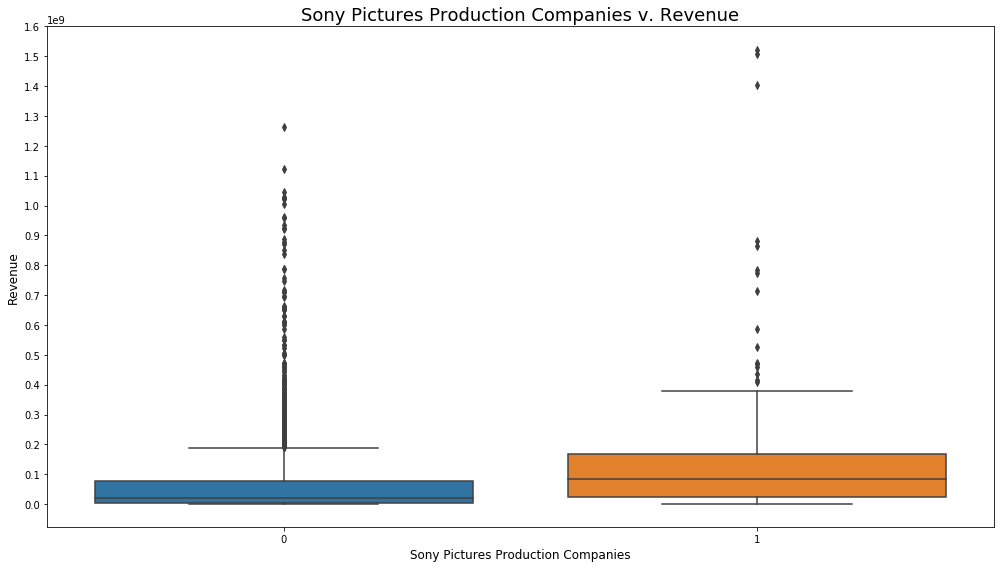

In [86]:
# sony_pictures_production_company v. Revenue
# Figure size 
plt.figure(figsize=(14,8)) 
# Title
plt.title("Sony Pictures Production Companies v. Revenue", fontsize = 18)
# Plot
sns.boxplot(movies['sony_pictures_production_company'], 
            movies['revenue'])
# X label
plt.xlabel('Sony Pictures Production Companies', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12)
# Y ticks
plt.yticks(np.arange(0, 1_700_000_000, 100_000_000))
# Tight layout
plt.tight_layout();

- Also there are two values in the `sony_production_company` feature. 1 is the Sony Pictures own compaines and 0 is not. There is clearly more nonsony own compaines in the dataset. However, we will be focusing on the 1's correlation with revenue. 
- For 1, there is also a right skewed distribution when compared to the target variable. 
- As a results, Sony also produces a lot of movies which does not make a lot of revenue. 
- However, there are outliers in this feature that do not follow that trend. Just like Disney, Sony produced the superhero movies like The Avengers which made about 1,519,557,910 dollars and the movie Avengers: Age of Ultron which made about 1,405,403,694 dollars. Therefore, superhero movies are an important factor in this dataset.
- Also the outliers are pushing the skewed, thus, this feature is a good predictor for the target variable because it is simlar to the `revenue` distribution. 

Next, lets check the `warner_bros_production_company` feature's correlation.

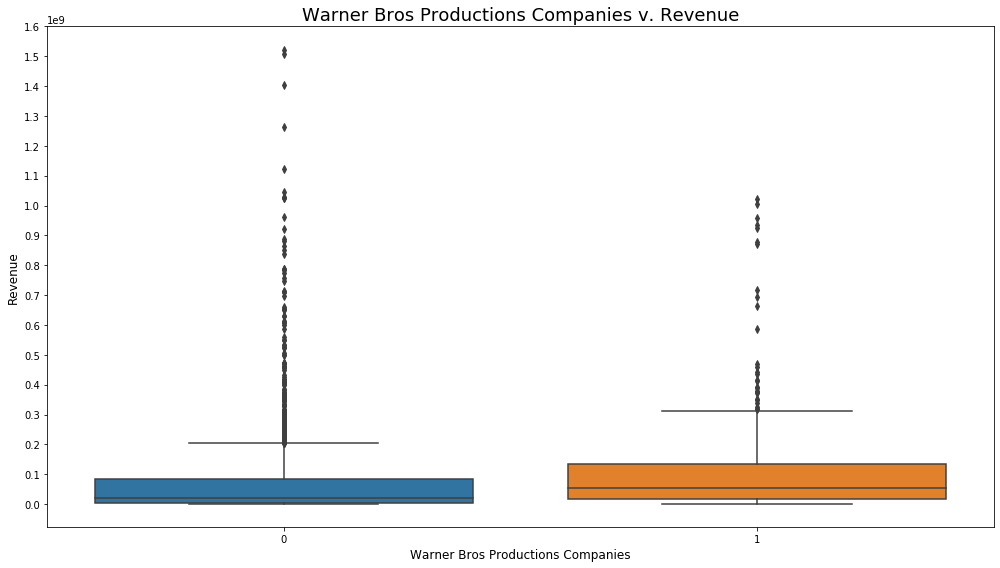

In [87]:
# warner_bros_production_company v. Revenue
# Figure size 
plt.figure(figsize=(14,8)) 
# Title
plt.title("Warner Bros Productions Companies v. Revenue", fontsize = 18)
# Plot
sns.boxplot(movies['warner_bros_production_company'], 
            movies['revenue'])
# X label
plt.xlabel('Warner Bros Productions Companies', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12)
# Y ticks
plt.yticks(np.arange(0, 1_700_000_000, 100_000_000))
# Tight layout
plt.tight_layout();

- Also there are two values in the `warner_bros_production_company` feature. 1 is the Warner Bros own compaines and 0 is not. There is clearly more nonwarner-bros own compaines in the dataset. However, we will be focusing on the 1's correlation with revenue. 
- For 1, there is also a right skewed distribution when compared to the target variable. 
- As a results, Warner Bros also produces a lot of movies which does not make a lot of revenue. 
- However, there are outliers in this feature that do not follow that trend. For instance, the movie The Hobbit: An Unexpected Journey made about 1,021,103,568 dollars. Therefore, Warner Bros sci fi movies also made a lot of revenue because of [the public trend that sci fi are watchable on the big screen](https://vusf.wordpress.com/2015/11/13/popular-sci-fi-films-what-makes-them-so-great/).
- Also the outliers are pushing the skewed, thus, this feature is a good predictor for the target variable because it is simlar to the `revenue` distribution. 

Next, lets check the `nbcuniversal_production_company` feature's correlation.

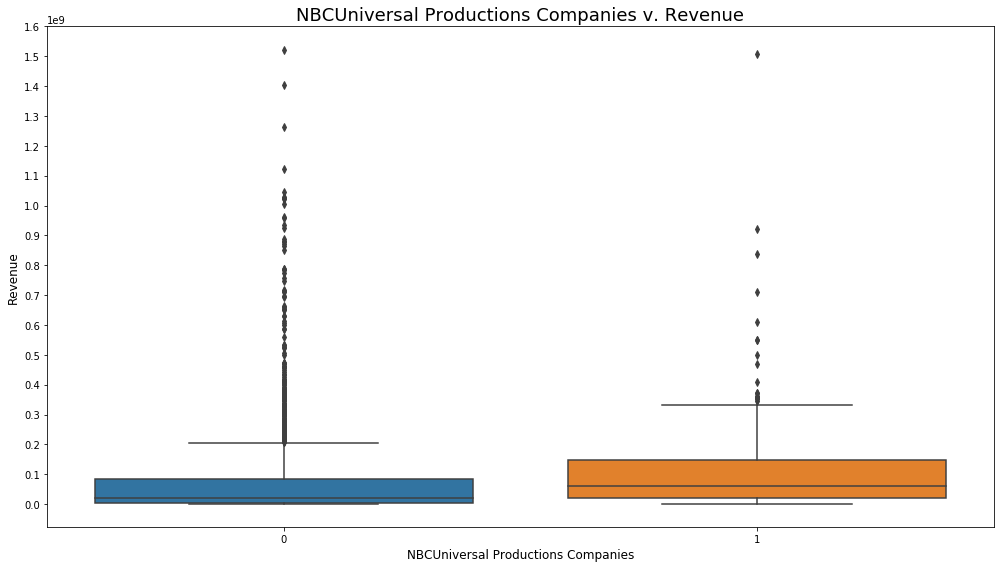

In [88]:
# nbcuniversal_production_company v. Revenue
# Figure size 
plt.figure(figsize=(14,8)) 
# Title
plt.title("NBCUniversal Productions Companies v. Revenue", fontsize = 18)
# Plot
sns.boxplot(movies['nbcuniversal_production_company'], 
            movies['revenue'])
# X label
plt.xlabel('NBCUniversal Productions Companies', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12)
# Y ticks
plt.yticks(np.arange(0, 1_700_000_000, 100_000_000))
# Tight layout
plt.tight_layout();

- Also there are two values in the `nbcuniversal_production_company` feature. 1 is the NBCUniversal own compaines and 0 is not. There is clearly more nonnbc own compaines in the dataset. However, we will be focusing on the 1's correlation with revenue. 
- For 1, there is also a right skewed distribution when compared to the target variable. 
- As a results, NBC also produces a lot of movies which does not make a lot of revenue. 
- However, there are outliers in this feature that do not follow that trend. For instance, the movie Furious 7 made about 1,506,249,360 dollars. Therefore, NBC action franchise movies also made a lot of revenue because of the public trend that [action franchise are watchable on the big screen](https://hbr.org/2013/06/hollywoods-obsession-with-blockbusters).
- Also the outliers are pushing the skewed, thus, this feature is a good predictor for the target variable because it is simlar to the `revenue` distribution. 

Next, lets check the `paramount_pictures_production_company` feature's correlation.

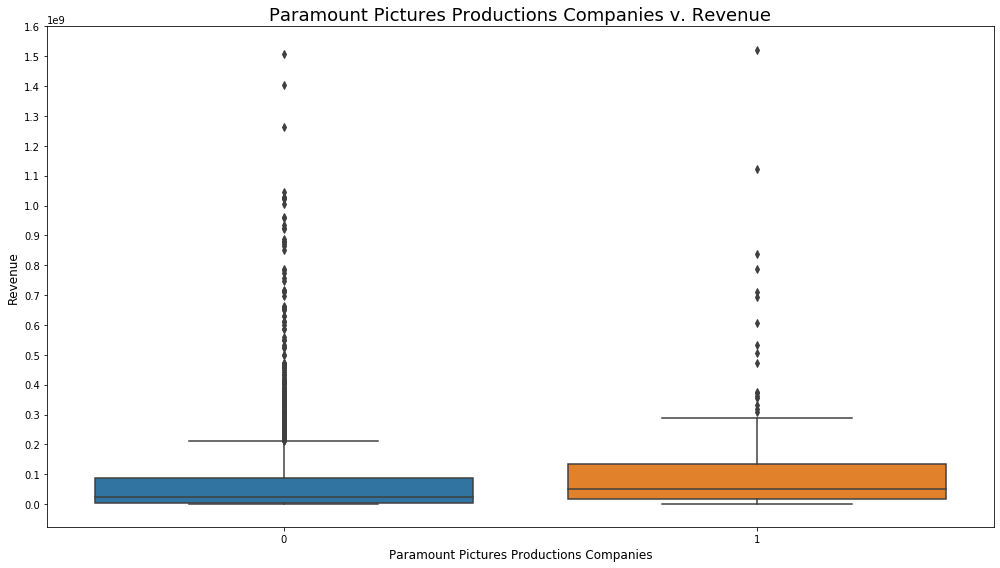

In [89]:
# paramount_pictures_production_company v. Revenue
# Figure size 
plt.figure(figsize=(14,8)) 
# Title
plt.title("Paramount Pictures Productions Companies v. Revenue", fontsize = 18)
# Plot
sns.boxplot(movies['paramount_pictures_production_company'], 
            movies['revenue'])
# X label
plt.xlabel('Paramount Pictures Productions Companies', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12)
# Y ticks
plt.yticks(np.arange(0, 1_700_000_000, 100_000_000))
# Tight layout
plt.tight_layout();

- Also there are two values in the `paramount_pictures_production_company` feature. 1 is the Paramount Pictures own compaines and 0 is not. There is clearly more nonparamount own compaines in the dataset. However, we will be focusing on the 1's correlation with revenue. 
- For 1, there is also a right skewed distribution when compared to the target variable. 
- As a results, Paramount also produces a lot of movies which does not make a lot of revenue. 
- However, there are outliers in this feature that do not follow that trend. For instance, the movie Transformers: Dark of the Moon made about 1,123,746,996	dollars. Just like NBCUniversal, Paramount action franchise movies make a lot of revenue. 
- Also the outliers are pushing the skewed, thus, this feature is a good predictor for the target variable because it is simlar to the `revenue` distribution. 

Lastly, lets check the `twenty_century_fox_production_company` feature's correlation.

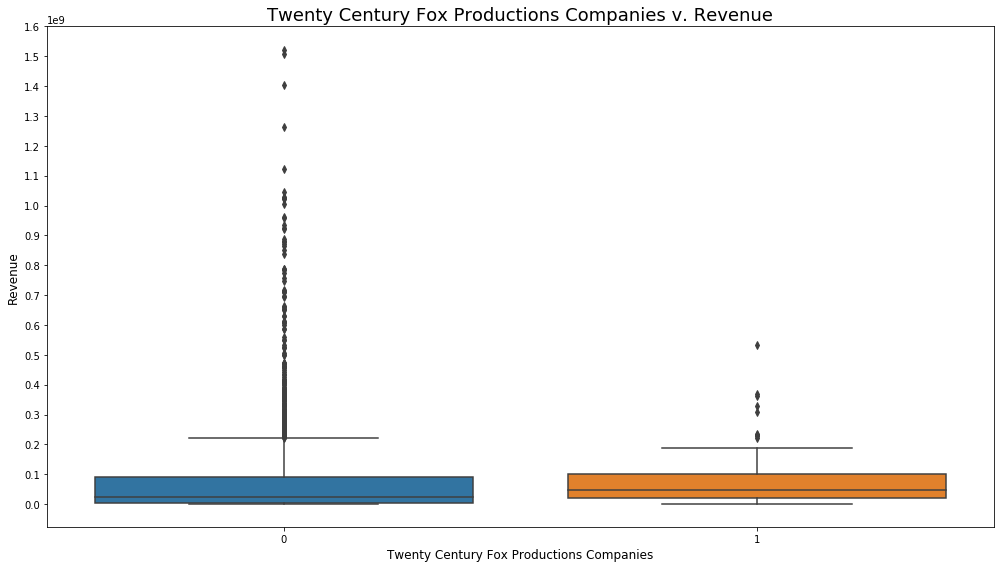

In [90]:
# twenty_century_fox_production_company v. Revenue
# Figure size 
plt.figure(figsize=(14,8)) 
# Title
plt.title("Twenty Century Fox Productions Companies v. Revenue", fontsize = 18)
# Plot
sns.boxplot(movies['twenty_century_fox_production_company'], 
            movies['revenue'])
# X label
plt.xlabel('Twenty Century Fox Productions Companies', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12)
# Y ticks
plt.yticks(np.arange(0, 1_700_000_000, 100_000_000))
# Tight layout
plt.tight_layout();

- Also there are two values in the `twenty_century_fox_production_company` feature. 1 is the Twenty Century Fox own compaines and 0 is not. There is clearly more nontwenty-century own compaines in the dataset. However, we will be focusing on the 1's correlation with revenue. 
- For 1, there is also a right skewed distribution when compared to the target variable. 
- As a results, Twenty Century Fox also produces a lot of movies which does not make a lot of revenue. 
- However, there are outliers in this feature that consider this statement above false. For instance, the movie The Revenant made about 532,950,503 dollars. Therefore, Twenty Century Fox movies "based on a true story" also made a lot of revenue. Yet, not as much money as the superhero or action franchise movies as we can see above. 
- Therefore, the outliers are pushing the skewed, but, it is not a good predictor for revenue because the distribution is smaller compare to the target variable's distribution.

In sum, we were able to deep dive into the correlations between the selected subset of features and the target variable. 

We found some interesting trends: 
- there are a lot of movies that have low revenue and there are a lot of outlier movies with extremely high revenue. 
- it seems like the `disney_production_company`, `sony_pictures_production_companies`, `nbcuniversal_production_companies`, and `paramount_picture_production_companies` companies created movies that have greats amounts of revenue. This is reasonable because in the past couple of years, superhero and action franchise movies have been getting a lot of traction in the public. 
- however, companies like `warner_bros_production_company` and `twenty_century_fox_production_company` that produces sci fi and "based on a true story" movies does not seem like it is following the trend of extremely high revenue. 
- thus, the public opinion is an important feature at predicting revenue.
- in addition, budget is an important feature because these themed movies with great amounts of revenue will not be able to be made if it did not have the lastest techologies to make the story come to life.
- also, some of the values in the `top_twenty_keywords` features have high revenue. Thus, if we can identify the keyword from a particular movie, we can determine if it had high or low revenue.
- lastly, influential actors are only able to make movies great amounts of revenue when they have creative control.

We are now going to change gears and reexamine the binary features. We will do this by using the dataframes we created in the [binary feature selection](#Creating-Binary-Features) to explore its frequency count.

### Investigating Binary Features Frequencies

[Back to Top](#Table-of-Contents:)

The only way to visually explore the binary features is to explore it's frequencies. We will begin in the order that we original created such features. We begin by plottting the `genres` feature.  

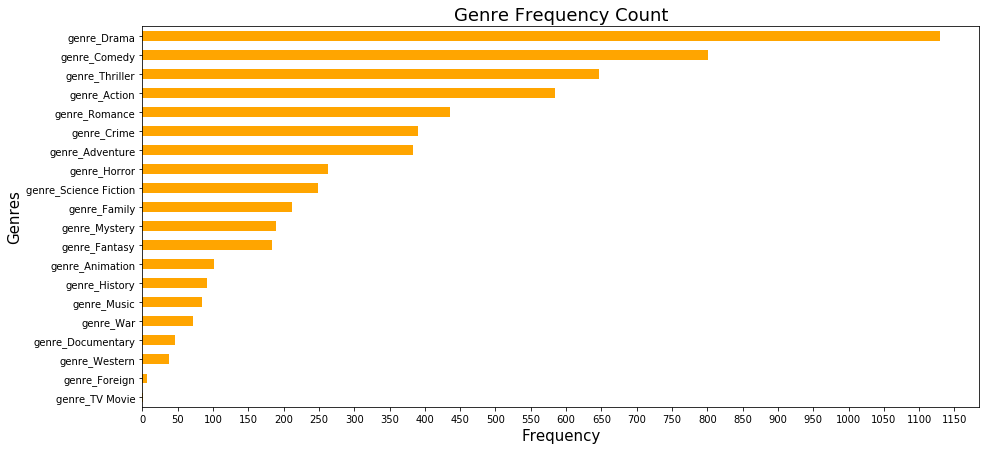

In [91]:
# Evaluating genres frequencies
# Plot
movies_genres_dummies.sum().sort_values(ascending = True).plot(kind = 'barh',
                                                               # Color of graph
                                                               color = 'orange', 
                                                               # Figure size
                                                               figsize = (15,7))
# Title
plt.title('Genre Frequency Count', fontsize = 18)
# X label
plt.xlabel('Frequency', fontsize = 15)
# Y label
plt.ylabel('Genres', fontsize = 15)
# X tick size
plt.xticks(np.arange(0, 1200, step = 50));

We observe that the highest count for the `genres` feature is Drama in the dataset. According to [Genre trends in global film production](https://stephenfollows.com/genre-trends-global-film-production/), it states, "Drama is the cheapest genre to produce as movies don’t necessarily require special sets, costumes, locations, props, special/visual effects, etc." In other words, the genre Drama is a great way for production companies to save some cash. 

The lowest counts in genere are the TV Movie and Foreign genres. This is reasonable because now and days, individuals are either streaming movies or they go out of their homes to view movies. Also, we have a couple of Foreign movies in this dataset because the US collaborated with other countries to make US movies. 

We will skip graphing the `status` feature because it is not very informative to graph. It only has two categories: released or rumoured. Clearly the highest count was the released value because released movies have to been released to gain revenue. Yet, deep diving in our dataset, we observe that the only movie that was rumoured was called Extremities and it did make revenue about 13,418,091 dollars. Thus, the "rumoured" status must be a mistake on the movies database website.

As our final graph in this section, we will check the `crew_departments` feature frequency count. 

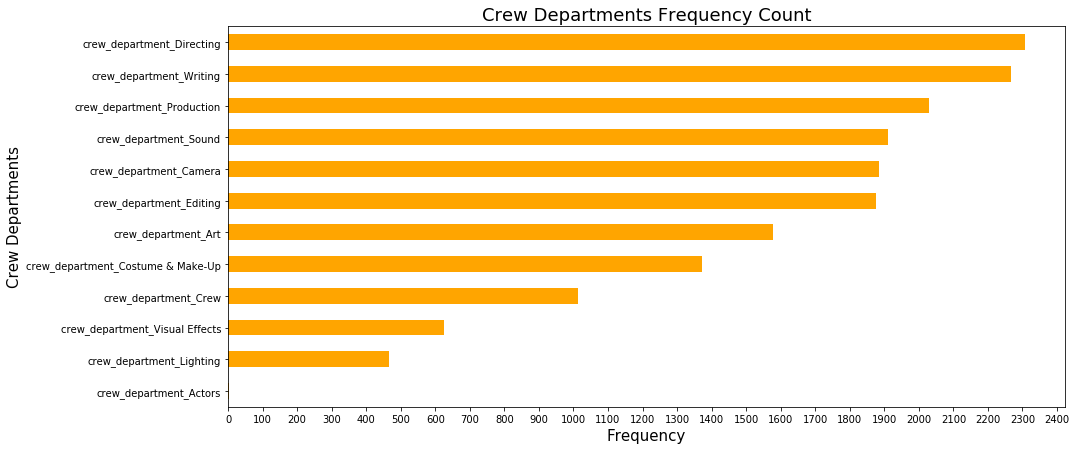

In [92]:
# Evaluating crew departments frequencies
# Plot
movies_crew_departments_dummies.sum().sort_values(ascending = True).plot(kind = 'barh',
                                                                        # Color of graph
                                                                        color = 'orange', 
                                                                        # Figure size  
                                                                        figsize = (15,7))
# Title
plt.title('Crew Departments Frequency Count', fontsize = 18)
# X label
plt.xlabel('Frequency', fontsize = 15)
# Y label
plt.ylabel('Crew Departments', fontsize = 15)
# X tick size
plt.xticks(np.arange(0, 2500, step = 100));

We observe that the highest count for the `crew_departments` feature is Directing. This is resonable because movies can not be made without Directors. According to [Who earns more: a director or an actor of a movie?](https://www.quora.com/Who-earns-more-a-director-or-an-actor-of-a-movie), it states, "The director has to work on that film for the majority of that time, whereas the actor only works on the film for a few days in pre-production, the 4-12 weeks of production and then a few days in post-production.  For that reason, an actor can easily shoot 4 or 5 films in a year, whereas the director would really struggle to make more than one film in any one year." As a result, we observe that Actors are very insignificant to the movie process.

In sum, we were able to deep drive into the binary features and determine which category had the highest count in each binary feature. 

We noticed that: 
- Drama movies are viewed the most 
- rumored must of been a mistake as a value in `status`
- Directing is the most important position on the crew

For the last part of our visualizations, we will investigate the datetime features.

### Investigating Datetime Features

[Back to Top](#Table-of-Contents:)

We have one datetime feature `release_date` and created two features from our datetime, the `month_release_date` and `year_release_date` features. We will like to detect trends and seasonality with these features. Lets begin by plotting the `month_release_date` feature.

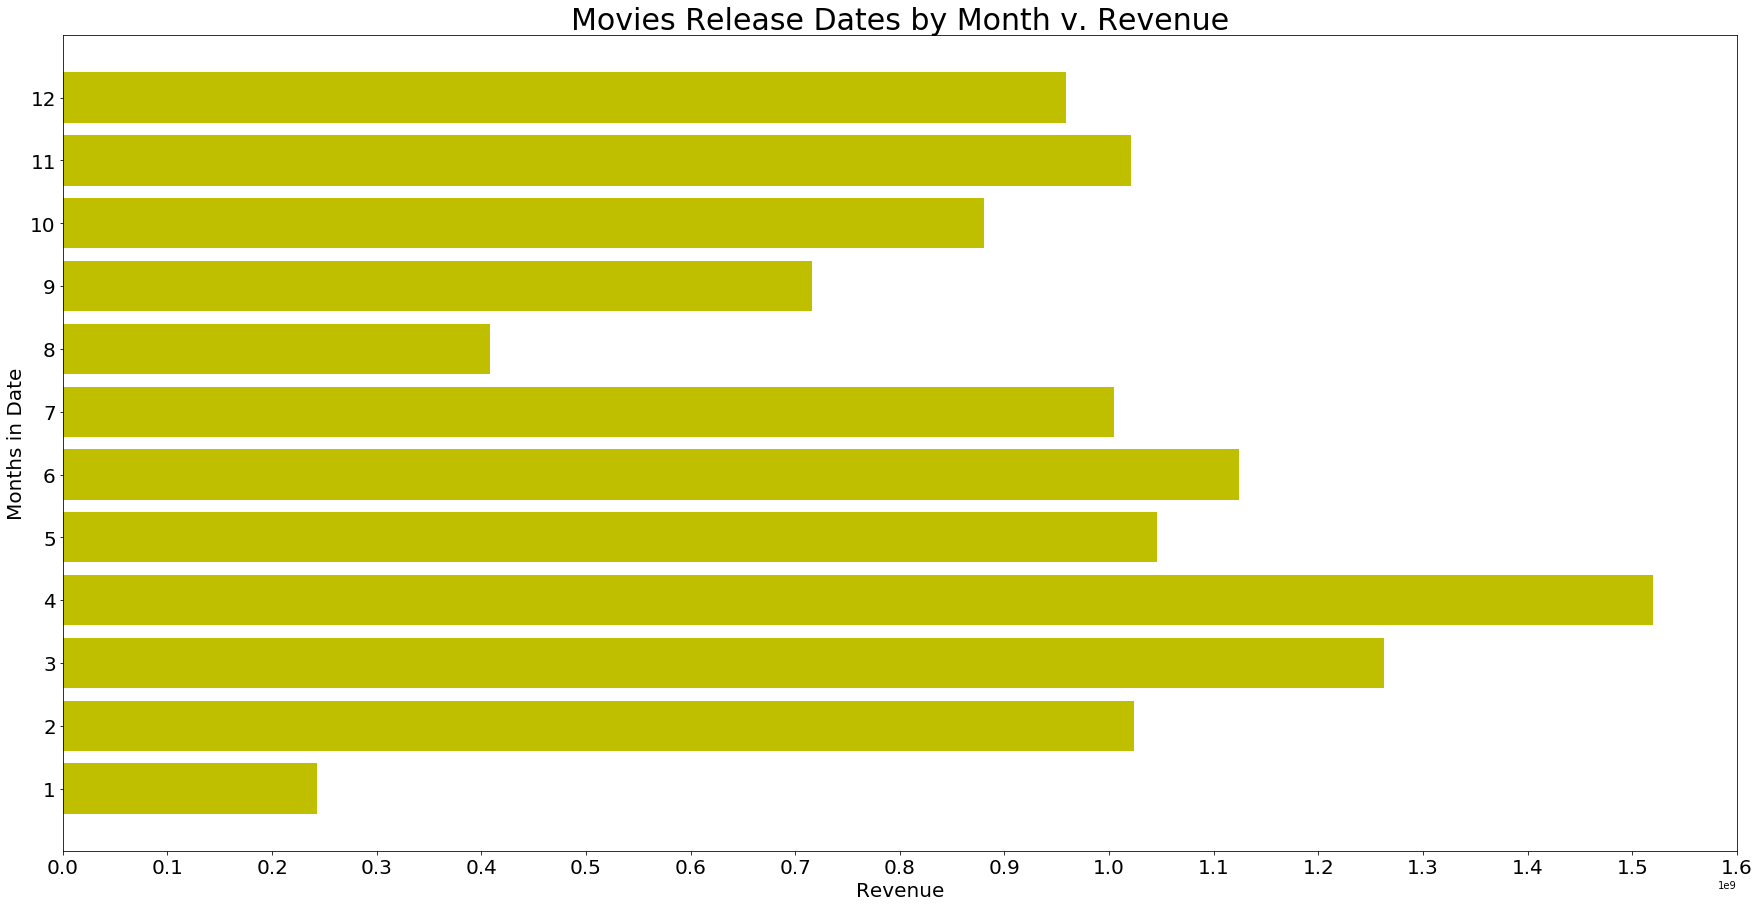

In [93]:
# Plotting the month_release_date
# Figure size 
plt.figure(figsize = (30, 15))
# Plot
plt.barh(movies['month_release_date'], 
         movies['revenue'], 
         color = 'y')
# Title
plt.title("Movies Release Dates by Month v. Revenue", fontsize = 30)
# X label
plt.xlabel('Revenue', fontsize = 20)
# X ticks
plt.xticks(np.arange(0, 1_700_000_000, 100_000_000))
# Y label
plt.ylabel('Months in Date', fontsize = 20)
# Y ticks
plt.yticks(np.arange(1, 13, step = 1))
# Tick size
plt.tick_params(labelsize = 20);

The `month_release_date` feature fluctuates over time. Every month has a different amount of movies released to the public. However, April makes the highest amount of revenue. According to [Rethinking the Seasonal Strategy](https://www.newyorker.com/magazine/2015/02/23/rethinking-seasonal-strategy), it states, "Hollywood’s release strategy has been governed by a simple calculus: summer is for blockbusters, the end of the year is for classy Oscar bait, and the other months are for stuff you fear no one wants to see." In other words, the month of April is used for "big blockbuster" movies where all of the family can enjoy. 

We also noticed that January and August makes the least amount of revenue. According to [Dump months](https://en.wikipedia.org/wiki/Dump_months), it states, "The dump months are what the film community calls the two periods of the year when there are lowered commercial and critical expectations for most new releases from American filmmakers and distributors." As a result, January and August becomes these months. 


Next, lets plot the `year_release_date` feature for more analysis. 

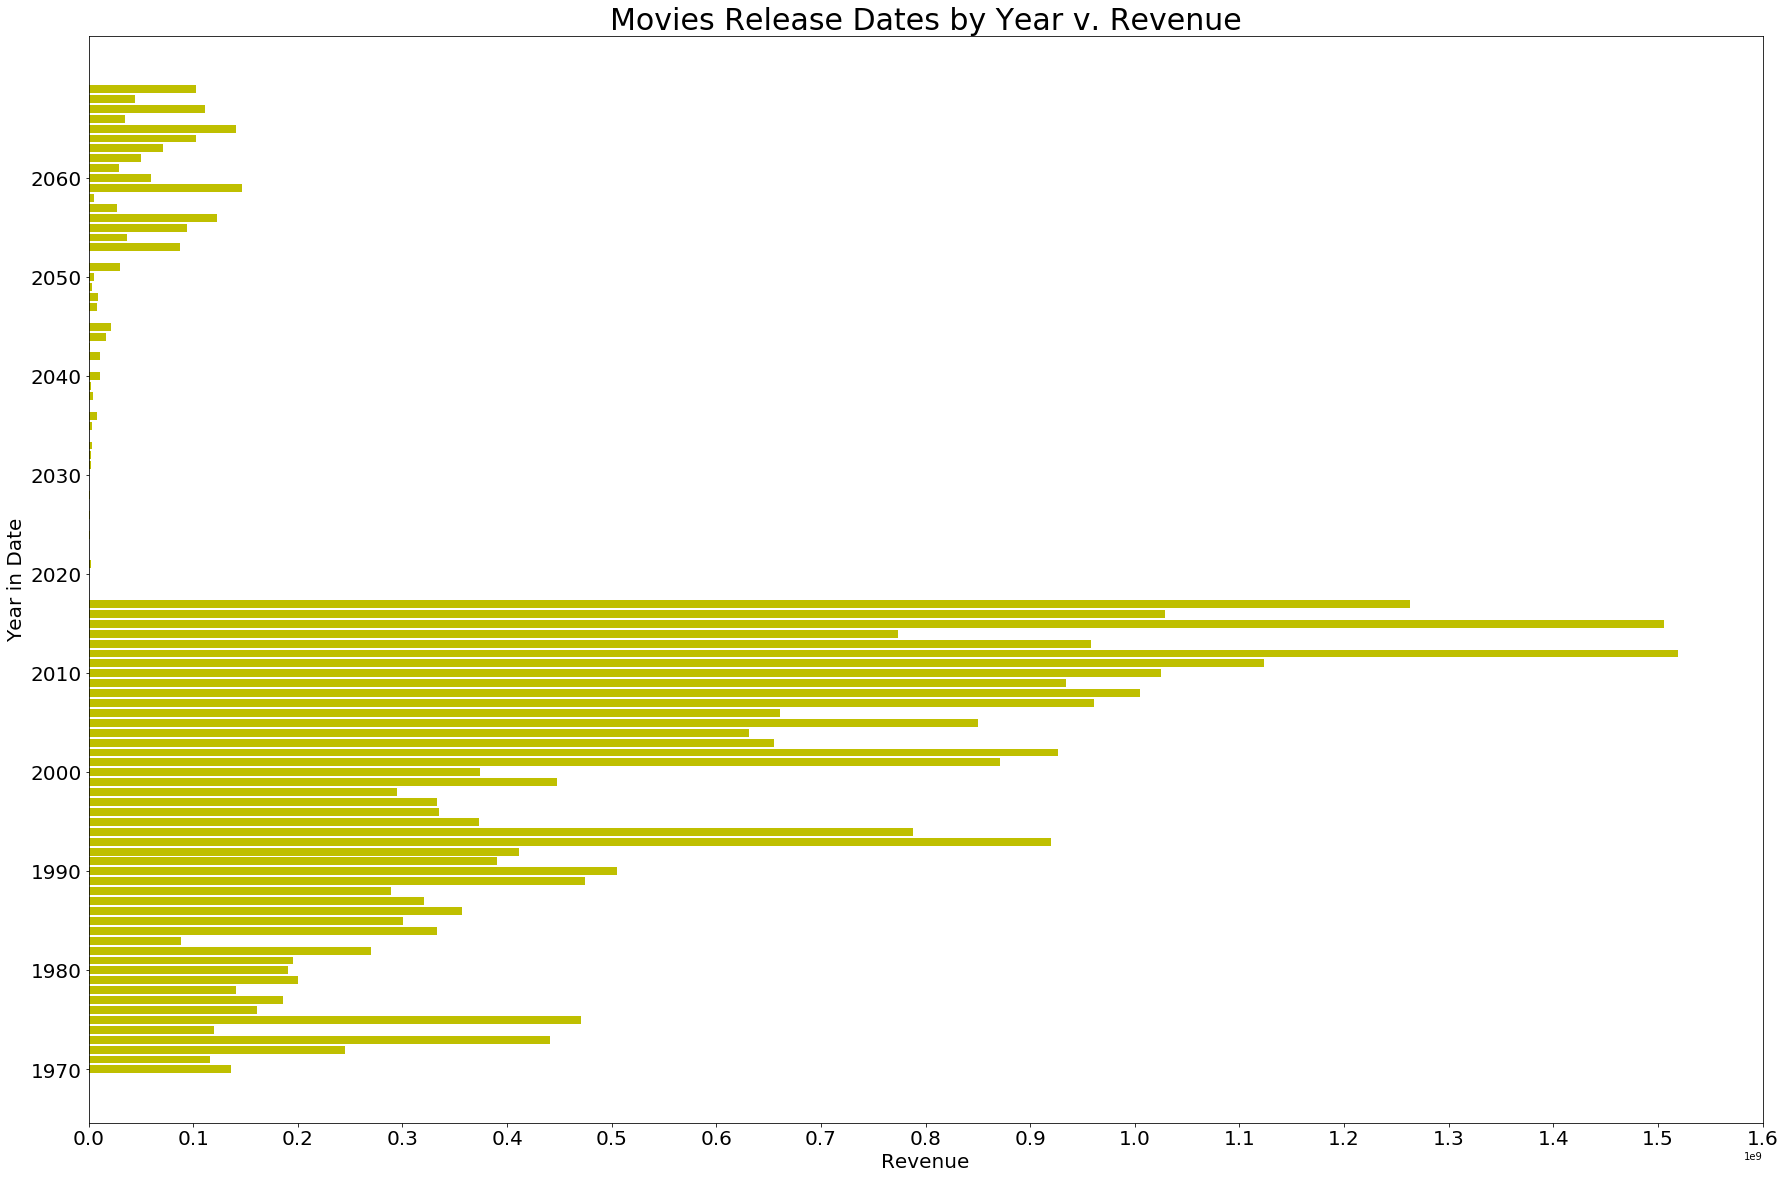

In [94]:
# Plotting the year_release_date
# Figure size 
plt.figure(figsize = (30, 20))
# Plot
plt.barh(movies['year_release_date'], 
         movies['revenue'],
         color = 'y')
# Title
plt.title("Movies Release Dates by Year v. Revenue", fontsize = 30)
# X label
plt.xlabel('Revenue', fontsize = 20)
# X ticks
plt.xticks(np.arange(0, 1_700_000_000, 100_000_000))
# Y label
plt.ylabel('Year in Date', fontsize = 20)
# Y ticks
plt.yticks(np.arange(1970, 2070, 10))
# Tick size
plt.tick_params(labelsize = 20);

The `year_release_date` feature also fluctuates over time. We observe that a lot of movies were released during 2001-2017 because of the high concentration in this region. According to [How many films are released each year?](https://stephenfollows.com/how-many-films-are-released-each-year/), it states, "Technological changes mean that movies are easier and cheaper to make and distribute. In addition, shifts in the industry mean that films spend far less long in cinemas before moving on to other platforms, such as DVD and Video On Demand." In other words, these techologies are making movies more enjoyable and accessible to watch. 

We also noticed that in 2013, the United States released the most movies. According to [How Are Movie Release Dates Chosen?](https://entertainment.howstuffworks.com/how-are-movie-release-dates-chosen2.htm), it states, "Movie release dates have grown increasingly important over the past decade thanks to the sheer number of films being released...Fast-forward four more years to 2013, and the number of major theater releases hit a whopping 659...As studios continue to produce greater numbers of films, the summer movie season could simply grow longer, which would allow each film to bask largely alone in the spotlight for a single weekend." Hence, movies created in 2013 had "spotlight" movies which made a lot of revenue. 

Lastly, there are outliers in this graph which we will consider to reexamine later. 

In sum, we were able to deep drive into the datetime features and determine the trends. We noticed that April and years between 2001-2017 has been the most active for movie releases. With that in mind, these time periods were able to gain a lot of reveune. 

In our final section in the EDA, we will determine our outliers. 

### Outliers

[Back to Top](#Table-of-Contents:)

An outlier is a data value that is either lower or higher than the rest of the data values in that particular dataset. For our dataset, we will take away the outliers that are nonsensical/irregular to the features. We were able to observe which features that have outliers from their visualizations. These features were the `popularity`, `runtime`, and `year_release_date` features. We will be begin with exploring the `popularity` feature for outliers.

In [95]:
# Popularity Feature
movies['popularity'].sort_values(ascending = True)

645       0.000578
751       0.007294
2505      0.042036
1918      0.045860
152       0.060645
           ...    
1129    154.801009
1820    185.330992
1989    187.860492
1461    228.032744
594     287.253654
Name: popularity, Length: 2308, dtype: float64

The `popularity` feature determines how popular a movie is to the public. Again, the feature is rated out of 100 percent, thus movies that are rated higher are outliers. Lets drop them now.

In [96]:
# Dropping the outliers
movies = movies[movies['popularity'] < 100]

# Lets check to see if it worked 
movies['popularity'].max()

89.887648

We were able to drop the outliers from the `popularity` feature. Next, lets explore the `runtime` feature for outliers.

In [97]:
# Runtime Feature
movies['runtime'].sort_values(ascending = True)

881      40.0
674      40.0
193      53.0
161      65.0
1513     68.0
        ...  
1635    214.0
1123    219.0
452     220.0
1642    248.0
1042    338.0
Name: runtime, Length: 2301, dtype: float64

The `runtime` feature determines how long the movie is in minutes. Again, the [average movie length](https://www.google.com/search?q=the+average+movie+length&rlz=1C5CHFA_enUS877US877&oq=the+average+movie&aqs=chrome.1.69i57j0l7.7070j0j7&sourceid=chrome&ie=UTF-8) is about 96.5 minutes. Therefore, any movie thats is drastically higher will be dropped. We will determine that any movie higher than 200 minutes will be dropped because that is only six outliers above this timeframe.

In [98]:
# Dropping the outliers
movies = movies[movies['runtime'] < 200]

# Lets check to see if it worked 
movies['runtime'].max()

197.0

We were able to drop the outliers from the `runtime` feature. Lastly, lets explore the `year_release_date` feature for outliers.

In [99]:
# Release_date Feature
movies['year_release_date'].sort_values(ascending = False)

472     2069
1265    2069
1104    2069
197     2069
1982    2069
        ... 
1596    1970
2163    1970
1895    1970
292     1970
2465    1970
Name: year_release_date, Length: 2295, dtype: int64

The `year_release_date` feature tells us when the movie was released that year. However, we are not able to determine movies from 2020 and onwards because this dataset was created in 2019. Therefore, we will drop these dates from our dataset by using the `released_date` feature because its easier to obtain the information.

In [100]:
# Dropping the outliers
movies = movies[movies['release_date'] < '2020-01-01']

# Lets check to see if it worked 
movies['release_date'].max()

Timestamp('2017-06-23 00:00:00')

We were able to drop the outliers from the `released_date` feature. In sum, we dropped all of the outliers we thought were nonsensical/irregular to our features. 

We will now transition into our next section: preprocessing.

## Preprocessing

[Back to Top](#Table-of-Contents:) 

Before we start modeling, we will need to do some preparation. We will begin by creating our X features and y. Then, we will train-test split. Lastly, we will determine the baseline scores.

### Creating X features and y

[Back to Top](#Table-of-Contents:) 

We need to create our features matrix (X) and target vector (y) for modeling. For our X features, we will use the majority of all the features in our dataset. However, we will not be able to use the `original_title` and `title` features because these features cannot be transformed into a numerical format. We also will not be able to use the `release_date`, `month_release_date`, and `year_release_date` features because we will not be able to scale these features for the future. In addition, we will not use the `runtime` and `twenty_century_fox_production_company` features because they are not good indicators for our target variable as seen in the EDA section. Lastly, for our y, we will use our target variable `revenue`. Lets implement this now. 

In [101]:
# X features
X = movies.drop(columns = ['revenue', 
                          'original_title', 
                          'title', 
                          'runtime',
                          'twenty_century_fox_production_company',
                          'release_date', 
                          'month_release_date', 
                          'year_release_date'], 
                          axis = 1) 
# y vector
y = movies['revenue'] 

In [102]:
# Check to see if it worked
X.columns

Index(['budget', 'popularity', 'disney_production_company',
       'warner_bros_production_company', 'nbcuniversal_production_company',
       'sony_pictures_production_company',
       'paramount_pictures_production_company', 'top_twenty_keywords',
       'top_twenty_influential_actors', 'genre_action', 'genre_adventure',
       'genre_animation', 'genre_comedy', 'genre_crime', 'genre_documentary',
       'genre_drama', 'genre_family', 'genre_fantasy', 'genre_foreign',
       'genre_history', 'genre_horror', 'genre_music', 'genre_mystery',
       'genre_romance', 'genre_science_fiction', 'genre_tv_movie',
       'genre_thriller', 'genre_war', 'genre_western', 'status_released',
       'status_rumored', 'crew_department_actors', 'crew_department_art',
       'crew_department_camera', 'crew_department_costume_&_make-up',
       'crew_department_crew', 'crew_department_directing',
       'crew_department_editing', 'crew_department_lighting',
       'crew_department_production', 'crew_dep

As one can see, we have a small dataset.

Next, lets use train-test split on our X and y.

### Train-test Split

[Back to Top](#Table-of-Contents:) 

In [103]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Finally, lets determine the baseline scores.

### Determing the Baseline Scores

[Back to Top](#Table-of-Contents:) 

The baseline score is an actual accuracy score. The accuracy score that we will be exploring is the coefficient of determination ($R^2$). The supplement metric that we will be exploring is the square root of the mean square error (RMSE). We use $R^2$ because it is the measuring score for regression models. We use the RMSE because our models depend on scale of y which is what we are predicting. In other words, RMSE will determine how far away our predictive values to our actual values. Thus, these baselines will serve as the benchmark for our regression models to beat.

In [104]:
# Determing the baseline scores 
# Source: dummy regressor sklearn
# Instantiate model
baseline = DummyRegressor(strategy = 'mean')

# Fit the model
baseline.fit(X_train, y_train)

# Getting the r^2 scores
train_score = baseline.score(X_train, y_train)
print(f'Baseline Train R^2 score: {train_score}')
test_score = baseline.score(X_test, y_test)
print(f'Baseline Test R^2 score: {test_score}')
print('---------------')

# Generate the predictions for RMSE
preds_train = baseline.predict(X_train)
preds_test = baseline.predict(X_test)

# Getting the RMSE
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, preds_train))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, preds_test))
print(f'Train RMSE: {rmse_train}')
print(f'Test RMSE: {rmse_test}')

Baseline Train R^2 score: 0.0
Baseline Test R^2 score: -0.0018754304426673585
---------------
Train RMSE: 138897519.03713375
Test RMSE: 169751451.97866294


Hence, we finished our preprocessing. We will now transition into our next section: modeling.

## Modeling

[Back to Top](#Table-of-Contents:) 

We are going to be modeling different regression models to determine how accurate it is towards answering our problem statement. Again, we will be exploring $R^2$ as the accuracy score and RMSE as the supplement metric. We will model Linear Regression with default hyperparameters and Ridge Regression, Lasso Regression, ElasticNet Regression, BaggedRegressor, & RandomForestRegressor with tuned hyperparameters.

Then, we will supplement models with it's respected visualizations. We will graph the predictive values with respect to the actual values. Also, we will visually explore the models' coefficients.

Lets create a helper function for model scores.

In [105]:
# Modeling
def modeling(model_name, preds_train, preds_test):
    # Getting r^2 scores
    train_score = model_name.score(Z_train, y_train)
    print(f'Train R^2 score: {train_score}')
    test_score = model_name.score(Z_test, y_test)
    print(f'Test R^2 score: {test_score}')
    print('---------------')
    
    # Getting the RMSE
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, preds_train))
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, preds_test))
    print(f'Train RMSE: {rmse_train}')
    print(f'Test RMSE: {rmse_test}') 

Lets begin our modeling section with the basic linear regression model.

### Linear Regression

[Back to Top](#Table-of-Contents:) 

Linear regression uses multiple predictor variables to estimate a continuous target. In other words, this model explores the relationship between the multiple predictor variables and continuous target.

In [106]:
# Modeling Linear
# Instantiate model
lr = LinearRegression()

# Fit model
lr.fit(X_train, y_train)

# Get r2 scores
train_score = lr.score(X_train, y_train)
print(f'Train R^2 score: {train_score}')
test_score = lr.score(X_test, y_test)
print(f'Test R^2 score: {test_score}')
print('---------------')
    
# Get predictions
lr_preds_train = lr.predict(X_train)
lr_preds_test = lr.predict(X_test)
    
# Get RMSE
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, lr_preds_train))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, lr_preds_test))
print(f'Train RMSE: {rmse_train}')
print(f'Test RMSE: {rmse_test}')

Train R^2 score: 0.617216239629885
Test R^2 score: 0.6043682706186607
---------------
Train RMSE: 85935229.42776598
Test RMSE: 106672430.82562853


**Insights:**

The linear regression model is faintly overfit, the training $R^2$ score is little higher than the testing $R^2$ score. Thus, this model has low bias and high variance. Also overall, this model is not a good indicator because the RMSE metrics are high.

Next, lets visually determine how close our model is to the actual values. 

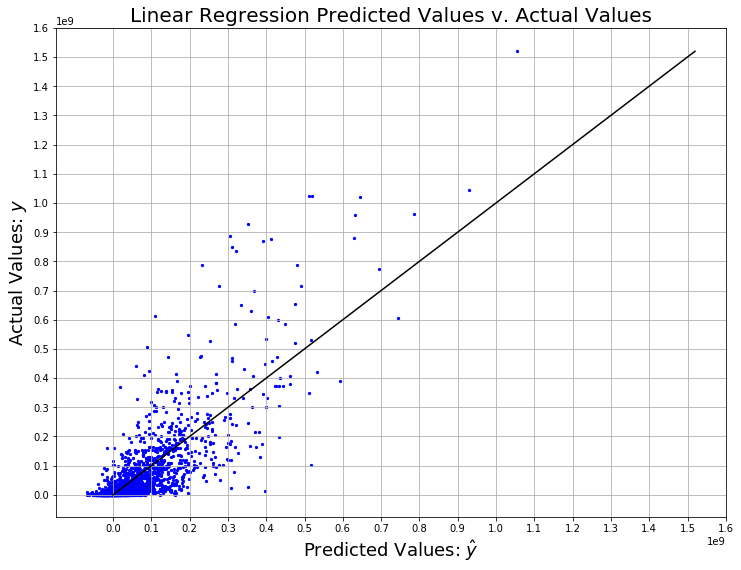

In [107]:
# Determing the predicitive v. actual values for Linear Regression
# Figure size
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values
plt.scatter(lr_preds_train, 
            y_train, 
            s = 5, 
            color = 'blue') 

# Plot a best fit line
plt.plot([0, np.max(y_train)],
         [0, np.max(y_train)], 
         color = 'black') 
    
# Grid on
plt.grid(True)
# Title
plt.title('Linear Regression Predicted Values v. Actual Values', fontsize = 20)
# X label
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 18) 
# X ticks
plt.xticks(np.arange(0, 1_700_000_000, 100_000_000))
# Y label
plt.ylabel("Actual Values: $y$", fontsize = 18)
# Y ticks
plt.yticks(np.arange(0, 1_700_000_000, 100_000_000));

We observe that our predicted values are concentrated around the best line of fit. However, when the range increases on the best line of fit, the spread of our predicted values increases. As a result, the higher the revenue is the higher the spread is for our predicted values. 

Lastly, we should explore the model's coefficients.

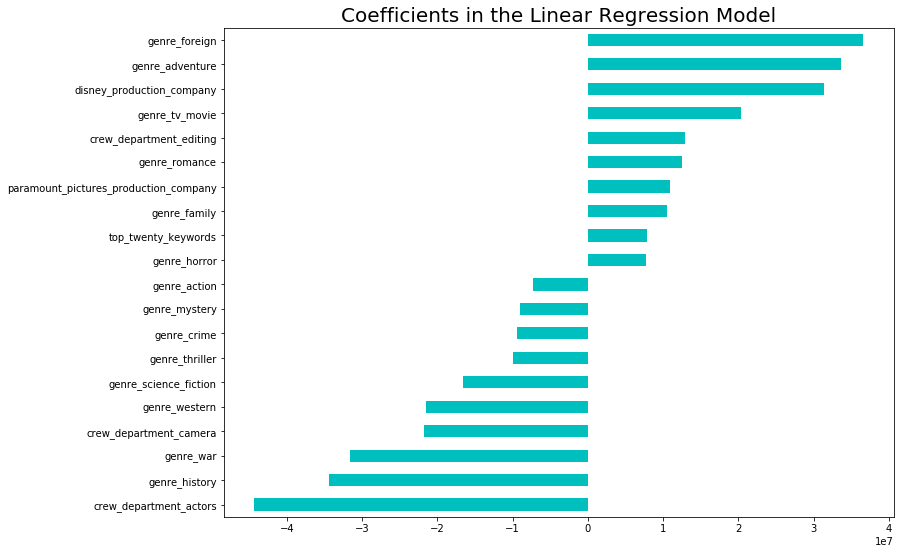

In [108]:
# Visualizing exploring Linear Regression Coefficients
# Getting the coefficients
# Source: Boom D.
coefficients = pd.Series(lr.coef_, 
                         index = X_train.columns)

# Getting the top and bottom 10 coefficients
coefficients_variations = pd.concat([coefficients.sort_values().head(10), 
                                     coefficients.sort_values().tail(10)])

# Figure size
plt.figure(figsize=(12,9))
# Ploting coefficients_variations                             
coefficients_variations.plot(kind = "barh", color = 'c')
    
# Title                              
plt.title("Coefficients in the Linear Regression Model", fontsize = 20);

**Insights:**

Clearly the coefficients are blown out of proportion given that they are in magnitudes of 10^7. Thus, the linear model is not scaled correctly. For this reason, we will not be able to believe these are the best coefficients out of this dataset.

We need to make our modeling process more efficient and the way to do that is to regularize our data. We will use the Standard Scaler to transform our data to regularize data.

In [109]:
# Using the Standard Scaler to scale our features
sc = StandardScaler()
sc.fit(X_train);
# Fit & transform the Standard Scaler 
Z_train = sc.fit_transform(X_train)
Z_test = sc.fit_transform(X_test)

Now that our data is regularize, we can work with regresssion models that use regularize data. Lets begin with modeling the Ridge Regression. 

### Ridge Regression

[Back to Top](#Table-of-Contents:) 

Ridge shrinks the coefficients and helps reduce the multicollinearity in the regression model. 

In [110]:
# Modeling Ridge
# Instantiate model
ridge = Ridge()

# Construct Grid Parameters
params_ridge = {'alpha': [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 100, 300, 600, 1000]}

# Perform Grid Search
gs_ridge = GridSearchCV(ridge, 
                        param_grid = params_ridge, 
                        cv = 5, 
                        scoring = 'r2')
    
# Fit model
gs_ridge.fit(Z_train, y_train);

 # Get best params
best_params = gs_ridge.best_params_
gs_ridge = gs_ridge.best_estimator_

# Get predictions
ridge_preds_train = gs_ridge.predict(Z_train)
ridge_preds_test = gs_ridge.predict(Z_test)

In [111]:
# Getting our scores
modeling(model_name = gs_ridge, 
         preds_train = ridge_preds_train, 
         preds_test = ridge_preds_test)

Train R^2 score: 0.6166026169360004
Test R^2 score: 0.5907160808529459
---------------
Train RMSE: 86004081.21353678
Test RMSE: 108497311.14064066


**Insights:**

The ridge regression model is faintly overfit, the training $R^2$ score is little higher than the testing $R^2$ score. Thus, this model has low bias and high variance. However, it has worst $R^2$ scores than linear regression. This is the case because our data already has a small number of features and if ridge reduces the multicollinearity, then it will have less features for this model. As a result, we have poor results.

Next, lets also visually determine how close our model is to the actual values. 

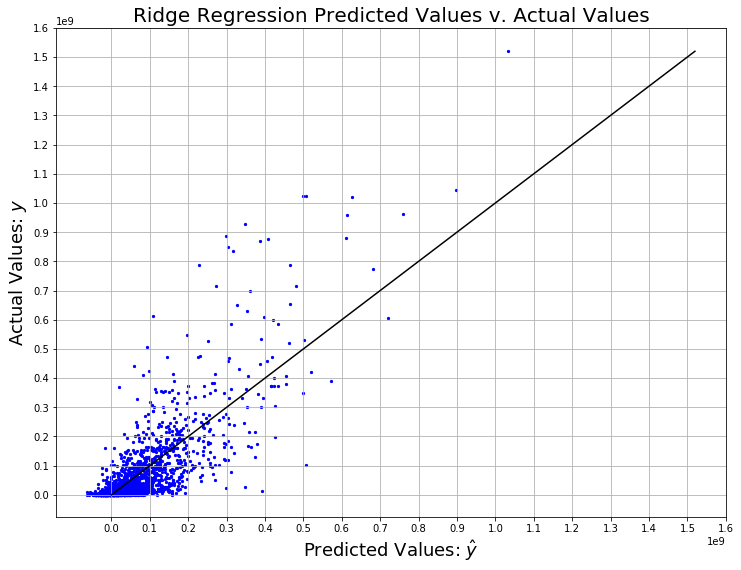

In [112]:
# Determing the predicitive v. actual values for Linear Regression
# Figure size
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values
plt.scatter(ridge_preds_train, 
            y_train, 
            s = 5, 
            color = 'blue') 

# Plot a best fit line
plt.plot([0, np.max(y_train)],
         [0, np.max(y_train)], 
         color = 'black') 
    
# Grid on
plt.grid(True)
# Title
plt.title('Ridge Regression Predicted Values v. Actual Values', fontsize = 20)
# X label
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 18) 
# X ticks
plt.xticks(np.arange(0, 1_700_000_000, 100_000_000))
# Y label
plt.ylabel("Actual Values: $y$", fontsize = 18)
# Y ticks
plt.yticks(np.arange(0, 1_700_000_000, 100_000_000));

We also observe that our predicted values are concentrated around the best line of fit. However, the spread of our predicted values when it increases on the line of best fit is closer than Linear regression. As a result, the higher the revenue the tighter the spread is for our predicted values.

Lastly, we should explore the model's coefficients.

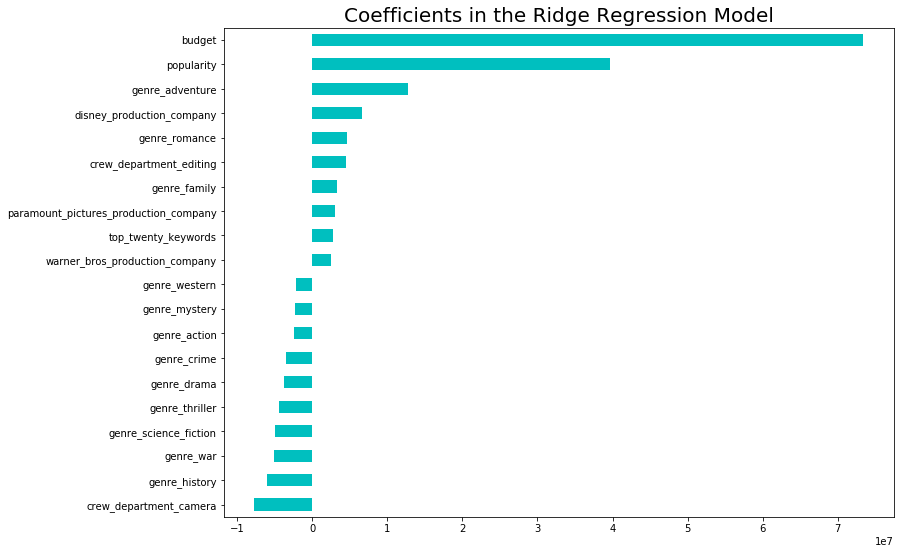

In [113]:
# Visualizing exploring Ridge Regression Coefficients
# Getting the coefficients
# Source: Boom D.
coefficients = pd.Series(gs_ridge.coef_, 
                         index = X_train.columns)
# Getting the top and bottom 10 coefficients
coefficients_variations = pd.concat([coefficients.sort_values().head(10), 
                                     coefficients.sort_values().tail(10)])
# Figure size
plt.figure(figsize=(12,9))
# Ploting coefficients_variations                             
coefficients_variations.plot(kind = "barh", color = 'c')
    
# Title                              
plt.title("Coefficients in the Ridge Regression Model", fontsize = 20);

**Insights:**

We observe that the regularization from Ridge took away most of the coefficients. Also interestingly, the features `budget` and `popularity` shows up as the highest two positive coefficients. This is reasonable because these two features were the top two correlated features with our target variable as explored in EDA. As a result, our outside research was correct, these two features are important factors. 

In addition, we observe that the `genre_adventure` is the third highest positive coefficient. This is reasonable because when we were exploring the production companies in EDA we noticed a trend that adventure movies is what is in trend for the public. 

Next, we will be modeling the Lasso Regression model to try to get better scores.

### Lasso Regression

[Back to Top](#Table-of-Contents:) 

Lasso is actually an acronym: L is for least, A is for abolute, S is for shrinkage, S is for selection, and O is for operator. In other words, the lasso helps us with reducing over-fitting but it can also help us in feature selection because some of our features will be eliminated. 

In [114]:
# Modeling Lasso
# Modeling Ridge
# Instantiate model
lasso = Lasso()

# Construct Grid Parameters
params_lasso = {'alpha': [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]}

# Perform Grid Search
gs_lasso = GridSearchCV(lasso, 
                        param_grid = params_lasso, 
                        cv = 5, 
                        scoring = 'r2')
    
# Fit model
gs_lasso.fit(Z_train, y_train);

 # Get best params
best_params = gs_lasso.best_params_
gs_lasso = gs_lasso.best_estimator_

# Get predictions
lasso_preds_train = gs_lasso.predict(Z_train)
lasso_preds_test = gs_lasso.predict(Z_test)

In [115]:
# Getting our scores
modeling(model_name = gs_lasso, 
         preds_train = lasso_preds_train, 
         preds_test = lasso_preds_test)

Train R^2 score: 0.6172162396298826
Test R^2 score: 0.5966715515509902
---------------
Train RMSE: 85935229.42776626
Test RMSE: 107705048.94918919


**Insights:**

The lasso regression model is faintly overfit, the training $R^2$ score is little higher than the testing $R^2$ score. Thus, this model has low bias and high variance. However, it has the best $R^2$ scores so far because linear regression was not scaled correctly. Yet, there is a small improvement from Ridge. Our data already has a small number of features and if lasso feature selects, then it would of created less features for this model.

Next, lets visually determine how close our model is to the actual values. 

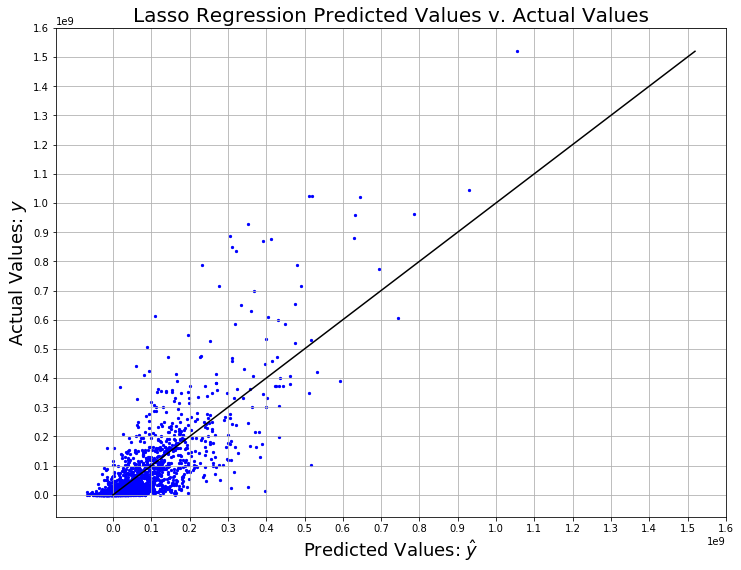

In [116]:
# Determing the predicitive v. actual values for Lasso Regression
# Figure size
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values
plt.scatter(lasso_preds_train, 
            y_train, 
            s = 5, 
            color = 'blue') 

# Plot a best fit line
plt.plot([0, np.max(y_train)],
         [0, np.max(y_train)], 
         color = 'black') 
    
# Grid on
plt.grid(True)
# Title
plt.title('Lasso Regression Predicted Values v. Actual Values', fontsize = 20)
# X label
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 18) 
# X ticks
plt.xticks(np.arange(0, 1_700_000_000, 100_000_000))
# Y label
plt.ylabel("Actual Values: $y$", fontsize = 18)
# Y ticks
plt.yticks(np.arange(0, 1_700_000_000, 100_000_000));

We also observe that our predicted values are concentrated around the best line of fit. However, the spread of our predicted values when it increases on the line of best fit is closer than both the Linear and Ridge regressions. As a result, the higher the revenue the tighter the spread is for our predicted values.

Lastly, we should explore the model's coefficients.

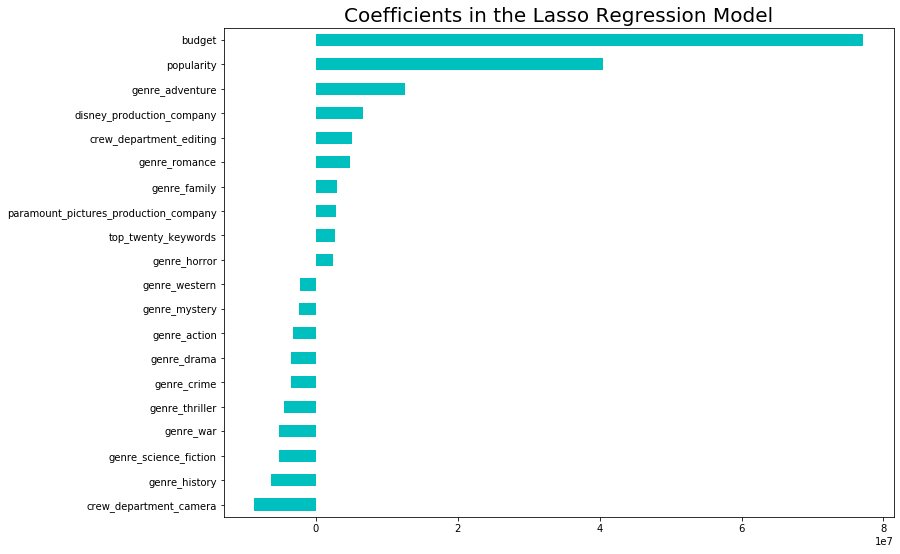

In [117]:
# Visualizing exploring Lasso Regression Coefficients
# Getting the coefficients
# Source: Boom D.
coefficients = pd.Series(gs_lasso.coef_, 
                         index = X_train.columns)
# Getting the top and bottom 10 coefficients
coefficients_variations = pd.concat([coefficients.sort_values().head(10), 
                                     coefficients.sort_values().tail(10)])
# Figure size
plt.figure(figsize=(12,9))
# Ploting coefficients_variations                             
coefficients_variations.plot(kind = "barh", color = 'c')
    
# Title                              
plt.title("Coefficients in the Lasso Regression Model", fontsize = 20);

**Insights:**

We observe that the regularization from Lasso zero-out coefficients. Thus, there are different top coefficients than Ridge. However, the features: `budget`, `popularity`, and `genre_adventure` still shows up as the highest positive coefficients. 

Next, we will be modeling the ElasticNet model because it is a combination of both Lasso & Ridge and maybe it can help with the overfitting between our $R^2$ scores.

### ElasticNet Regression

[Back to Top](#Table-of-Contents:) 

ElasticNet is a linear regression with combined L1 and L2 priors as regularizer. In other words, effectively it will shrink some coefficients and set some to 0 for sparse selection.

In [118]:
# Modeling ElasticNet
# Instantiate model
elasticnet = ElasticNet(random_state = 42)

# Construct Grid Parameters
params_elasticnet = {'alpha': [0.001, 0.1, 1, 5, 10, 50, 100, 500, 1000, 5000],
                     'l1_ratio': [0.1, 0.3, 0.5, 0.9, 1, 1.1],
                     'max_iter': [1000, 2000, 3000, 4000, 5000]}

# Perform Grid Search
gs_elasticnet = GridSearchCV(elasticnet, 
                             param_grid = params_elasticnet, 
                             cv = 5, 
                             scoring = 'r2')
    
# Fit model
gs_elasticnet.fit(Z_train, y_train);

 # Get best params
best_params = gs_elasticnet.best_params_
gs_elasticnet = gs_elasticnet.best_estimator_

# Get predictions
elasticnet_preds_train = gs_elasticnet.predict(Z_train)
elasticnet_preds_test = gs_elasticnet.predict(Z_test)

In [119]:
# Getting our scores
modeling(model_name = gs_elasticnet, 
         preds_train = elasticnet_preds_train, 
         preds_test = elasticnet_preds_test)

Train R^2 score: 0.6161353771006781
Test R^2 score: 0.5885889656181477
---------------
Train RMSE: 86056471.10835816
Test RMSE: 108778884.87330115


**Insights:**

The elasticnet regression model is faintly overfit, the training $R^2$ score is little higher than the testing $R^2$ score. Thus, this model has low bias and high variance. However, it does not have better $R^2$ scores than Lasso and Ridge because of our data size. Our hypothesis was incorrect, this model did not improve the $R^2$ scores.

Next, lets visually determine how close our model is to the actual values. 

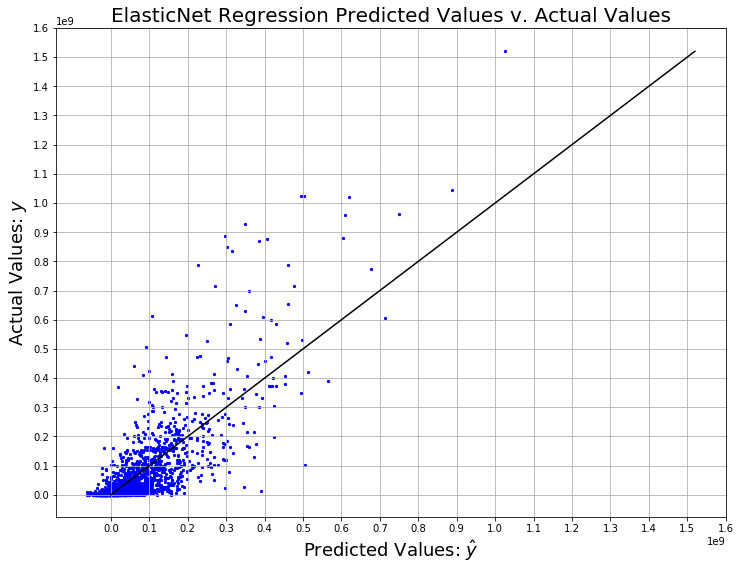

In [120]:
# Determing the predicitive v. actual values for ElasticNet Regression
# Figure size
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values
plt.scatter(elasticnet_preds_train, 
            y_train, 
            s = 5, 
            color = 'blue') 

# Plot a best fit line
plt.plot([0, np.max(y_train)],
         [0, np.max(y_train)], 
         color = 'black') 
    
# Grid on
plt.grid(True)
# Title
plt.title('ElasticNet Regression Predicted Values v. Actual Values', fontsize = 20)
# X label
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 18) 
# X ticks
plt.xticks(np.arange(0, 1_700_000_000, 100_000_000))
# Y label
plt.ylabel("Actual Values: $y$", fontsize = 18)
# Y ticks
plt.yticks(np.arange(0, 1_700_000_000, 100_000_000));

We also observe that our predicted values are concentrated around the best line of fit. However, the spread of our predicted values when it increases on the line of best fit is less closer than both the Ridge and Lasso regressions. 

Lastly, we should explore the model's coefficients.

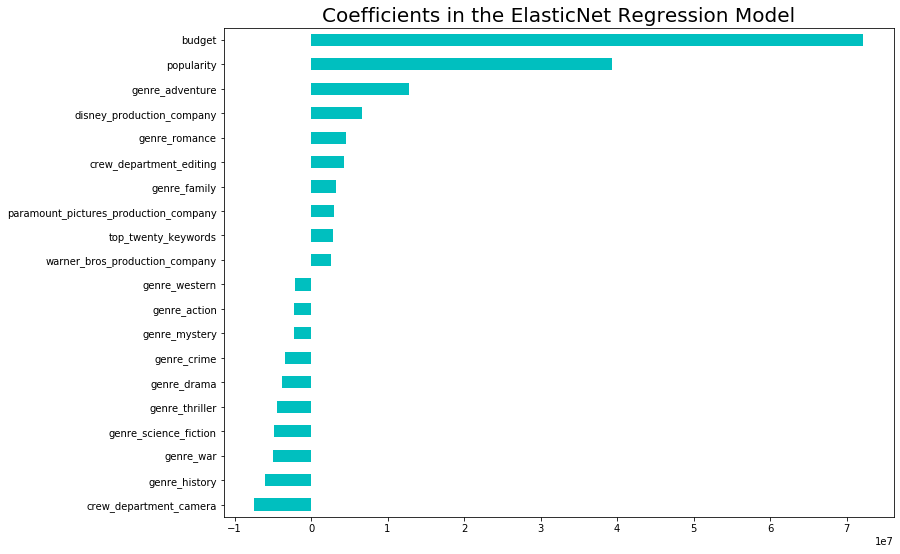

In [121]:
# Visualizing exploring ElasticNet Regression Coefficients
# Getting the coefficients
# Source: Boom D.
coefficients = pd.Series(gs_elasticnet.coef_, 
                         index = X_train.columns)
# Getting the top and bottom 10 coefficients
coefficients_variations = pd.concat([coefficients.sort_values().head(10), 
                                     coefficients.sort_values().tail(10)])
# Figure size
plt.figure(figsize=(12,9))
# Ploting coefficients_variations                             
coefficients_variations.plot(kind = "barh", color = 'c')
    
# Title                              
plt.title("Coefficients in the ElasticNet Regression Model", fontsize = 20);

**Insights:**

We observe that the regularization from the ElasticNet makes the coefficents very similar to the Ridge regression. Also, the features: `budget`, `popularity`, and `genre_adventure` still shows up as the highest positive coefficients. 

In sum, we were able to model the three popular regularization models, Ridge, Lasso, and ElasticNet, as well as the basic Linear regression. Also, we were able to visually determine how close our models were to the actual values and explore the coefficients. 

However, we will want to fix the overfitting and improve the $R^2$ scores. The way we can do that is by using ensembles models. Ensemble models combines several base models in order to produce one optimal predictive model. Thus, we will model the BaggingRegressor model because Decision Trees have limitations. In particular, trees that are grown very deep tend to learn highly irregular patterns.

### BaggingRegressor

[Back to Top](#Table-of-Contents:) 

Bagged Decision Trees fixes this problem by exposing different trees to different sub-samples of the training set.

In [122]:
# Modeling Bagged Decision Tree
# Instantiate model
bg = BaggingRegressor(random_state = 42)
    
# Construct Grid Parameters
params_bg = {'n_estimators': [10, 50, 100, 150, 200],
             'n_jobs': [-2, None, 2, 4]}

# Perform Grid Search
gs_bg = GridSearchCV(bg, 
                     param_grid = params_bg, 
                     cv = 5, 
                     scoring = 'r2')
    
# Fit model
gs_bg.fit(Z_train, y_train);

 # Get best params
best_params = gs_bg.best_params_
gs_bg = gs_bg.best_estimator_

# Get predictions
bg_preds_train = gs_bg.predict(Z_train)
bg_preds_test = gs_bg.predict(Z_test)

In [123]:
# Getting our scores
modeling(model_name = gs_bg, 
         preds_train = bg_preds_train, 
         preds_test = bg_preds_test)

Train R^2 score: 0.9438966962570043
Test R^2 score: 0.6892121959431671
---------------
Train RMSE: 32899455.225147486
Test RMSE: 94545011.39428486


**Insights:**

The BaggingRegressor model is extremely overfit, the training $R^2$ score is much higher than the testing $R^2$ score. Thus, this model has low bias and high variance. Also overall, this model is not a good indicator because the RMSE metrics are high. However, it is our best $R^2$ scores yet and in effect, our RMSE metrics are much lower. 

Next, lets visually determine how close our model is to the actual values.

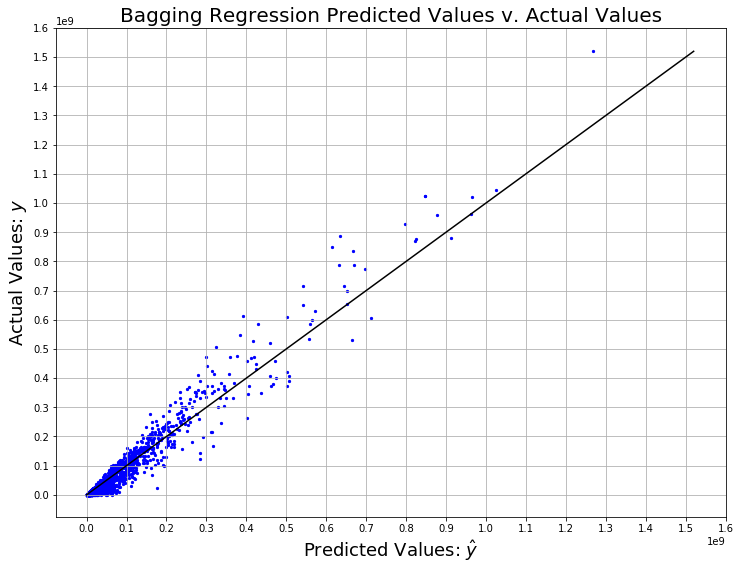

In [124]:
# Determing the predicitive v. actual values for Bagged Regression
# Figure size
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values
plt.scatter(bg_preds_train, 
            y_train, 
            s = 5, 
            color = 'blue') 

# Plot a best fit line
plt.plot([0, np.max(y_train)],
         [0, np.max(y_train)], 
         color = 'black') 
    
# Grid on
plt.grid(True)
# Title
plt.title('Bagging Regression Predicted Values v. Actual Values', fontsize = 20)
# X label
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 18) 
# X ticks
plt.xticks(np.arange(0, 1_700_000_000, 100_000_000))
# Y label
plt.ylabel("Actual Values: $y$", fontsize = 18)
# Y ticks
plt.yticks(np.arange(0, 1_700_000_000, 100_000_000));

We also observe that our predicted values are highly concentrated around the best line of fit. It is our best graph yet because the predicted values have a smaller spread than the other regression models.

Unfortunately, we will not be able to visually explore the coefficients in the BaggingRegressor because there is not an attribute for such task. 

The final model we will explore is the RandomForestRegressor because Random Forest can be thought of as bagging, with a slight tweak.

### RandomForestRegressor

[Back to Top](#Table-of-Contents:) 

Random Forest are very similar to Bagged Decision Trees. Yet, the difference is only a subset of features are selected at random out of the total. In other words, the best split feature from the subset is used to split each node in a tree.

In [125]:
# Modeling Bagged Decision Tree
# Instantiate model
rf = RandomForestRegressor(random_state = 42)
    
# Construct Grid Parameters
params_rf = {'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
             'max_depth': [10, 15, 20],
             'min_samples_split': [2, 4, 6, 8],
             'min_samples_leaf': [2, 4, 6, 8],
             'max_features': ['auto', 'sqrt'],
             'max_leaf_nodes': [20, 40]}

# Perform Grid Search
gs_rf = GridSearchCV(rf, 
                     param_grid = params_rf, 
                     cv = 5, 
                     scoring = 'r2')
    
# Fit model
gs_rf.fit(Z_train, y_train);

 # Get best params
best_params = gs_rf.best_params_
gs_rf = gs_rf.best_estimator_

# Get predictions
rf_preds_train = gs_rf.predict(Z_train)
rf_preds_test = gs_rf.predict(Z_test)

In [126]:
# Getting our scores
modeling(model_name = gs_rf, 
         preds_train = rf_preds_train, 
         preds_test = rf_preds_test)

Train R^2 score: 0.7998356346426161
Test R^2 score: 0.6713396149561364
---------------
Train RMSE: 62142378.301843576
Test RMSE: 97225528.91948424


**Insights:**

The RandomForestRegressor model is overfit, the training $R^2$ score is higher about 12 percent than the testing $R^2$ score. Thus, this model has low bias and high variance. However, the variance is smaller compare to all the other models we evaluated. Even if the RMSE metrics are still high. 

Next, lets visually determine how close our model is to the actual values. 

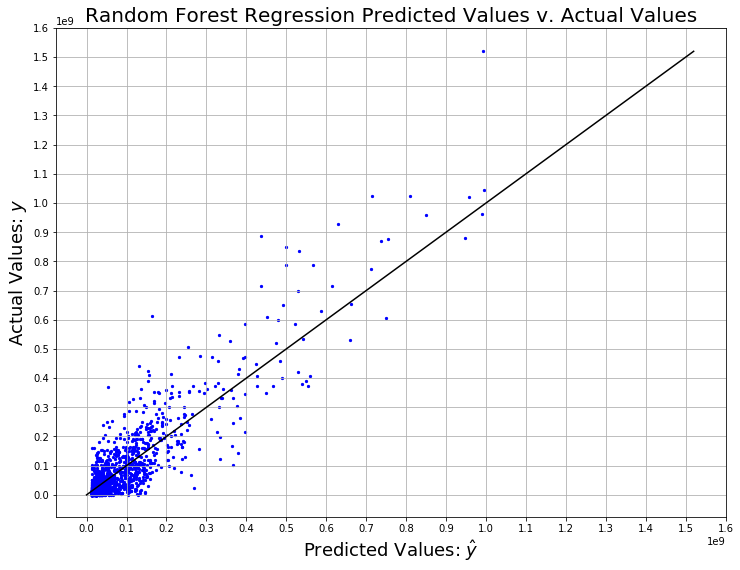

In [127]:
# Determing the predicitive v. actual values for Random Forest Regression
# Figure size
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values
plt.scatter(rf_preds_train, 
            y_train, 
            s = 5, 
            color = 'blue') 

# Plot a best fit line
plt.plot([0, np.max(y_train)],
         [0, np.max(y_train)], 
         color = 'black') 
    
# Grid on
plt.grid(True)
# Title
plt.title('Random Forest Regression Predicted Values v. Actual Values', fontsize = 20)
# X label
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 18) 
# X ticks
plt.xticks(np.arange(0, 1_700_000_000, 100_000_000))
# Y label
plt.ylabel("Actual Values: $y$", fontsize = 18)
# Y ticks
plt.yticks(np.arange(0, 1_700_000_000, 100_000_000));

We also observe that our predicted values are concentrated around the best line of fit. However, the spread of our predicted values when it increases on the line of best fit is tighter than Linear, Lasso, Ridge, and ElasticNet regressions.

Unfortunately, we will also not be able to visually explore the coefficients in the RandomForestRegressor because there is not an attribute for such task.

In sum, we were able to model two tree ensemble models. Hence, we decided that the best model we evaluated is the RandomForestRegressor because its great with our high dimensional data and it has the smallest variance between the $R^2$ testing and $R^2$ testing scores. 

We will now transition into our final section: conclusions and recommendations. 

## Conclusion and Recommendations

[Back to Top](#Table-of-Contents:) 

|Model|Training $R^2$ Score|Testing $R^2$ Score|RMSE Training|RMSE Testing|
|---|---|---|---|---|
|Basline|0.000|-0.002|13889519|169751452|
|Linear|0.617|0.604|85935229|106672431|
|Ridge|0.617|0.591|86004081|108497311|
|Lasso|0.617|0.600|85935229|107705049|
|ElasticNet|0.616|0.600|86056471|108778885|
|BaggingRegressor|0.944|0.700|32899455|94545011|
|RandomForestRegressor|0.800|0.671|62142378|97225529|

All of the regression models surpassed the baseline accuracy. Therefore, the best model was the **RandomForestRegressor** Model. According to the testing $R^2$ score, the RandomForestRegressor was able to manage well with unknown data. However, the model was still overfit because it had low bias and high variance.

Despite the overfitting, this model can be use to predict the revenue of a US movie given that we know the selected features of that particular movie. The top two features that production companies should consider to focus on to get a return on their investments should be the `budget` and `popularity` features. This is the case because these features were consistently the top two correlated features with the target variable. Also, production companies should consider investing in `genre_adventure` because that movie genre was our outliers with extremely high revenue and it was the third highest coefficient in our regularized models. 

Yet, the RandomForestRegressor still had its limitations. We can not fully interpret it because it does not predict beyond the range of the training data. Also, it created an overfit on our dataset because it cannot handle the noise. In other words, additional noise features could hindered our model's results.

We can improve our model's $R^2$ scores, if we further tuned our hyperparameters mand eliminated more outliers.

In the end, we still have lingering questions we need to ask:
- Can we use a Convolutional Neural Network on the image data as part of a transfer learning process to engineer additional features in our prediction model?
- Can we feature engineer our features and target variable to optimized our predict model results? I.e. taking the logarithm.
- Will this model still be valid 5 years from now when consumer preferences/trends change when it comes to movies? Given that we already seen different trends throughout the decades in our EDA.

## Sources

[Back to Top](#Table-of-Contents:) 

- [Google Web Interface and Search Language Codes](https://sites.google.com/site/tomihasa/google-language-codes)
- [IMDB website](https://www.imdb.com/)
- [Boom or Bust? Factors that Influence Box Office Revenue](https://medium.com/@nealsivadas/boom-or-bust-factors-that-influence-box-office-revenue-c8e4442d141f)
- [EVERY COMPANY DISNEY OWNS: A MAP OF DISNEY'S WORLDWIDE ASSETS](https://www.titlemax.com/discovery-center/money-finance/companies-disney-owns-worldwide/)
- [List of assets owned by 21st Century Fox](https://en.wikipedia.org/wiki/List_of_assets_owned_by_21st_Century_Fox)
- [List of assets owned by WarnerMedia](https://en.wikipedia.org/wiki/List_of_assets_owned_by_WarnerMedia)
- [List of assets owned by NBCUniversal](https://en.wikipedia.org/wiki/List_of_assets_owned_by_NBCUniversal)
- [Sony Pictures Entertainment Motion Picture Group](https://en.wikipedia.org/wiki/Sony_Pictures_Entertainment_Motion_Picture_Group)
- [Paramount Pictures](https://www.wikiwand.com/en/Paramount_Pictures)
- [Movie Keywords From The Numbers](https://www.the-numbers.com/movies/keywords#keyword_overview=od1)
- [Here Are The 20 Richest Actors In The World & Their Net Worth](https://moneyinc.com/richest-actors-in-the-world-in-2019/)
- [Fourth Pirates Of The Caribbean Is Most Expensive Movie Ever With Costs Of 410 Million Dollars](https://www.forbes.com/sites/csylt/2014/07/22/fourth-pirates-of-the-caribbean-is-most-expensive-movie-ever-with-costs-of-410-million/#5072a4eb364f) 
- [Why Wonder Woman Is The Best DCEU Movie So Far](https://www.cinemablend.com/news/1666420/why-wonder-woman-is-the-best-dceu-movie-so-far)
- [Average movie length](https://www.google.com/search?q=the+average+movie+length&rlz=1C5CHFA_enUS877US877&oq=the+average+movie&aqs=chrome.1.69i57j0l7.7070j0j7&sourceid=chrome&ie=UTF-8)
- [Best Business Decisions Made by Actors](https://www.investopedia.com/financial-edge/0912/actors-who-got-a-share-of-film-profits.aspx) 
- [Advice from Robert Downey Jr](https://www.newyorker.com/culture/cultural-comment/advice-for-robert-downey-jr-avengers-ultron-cultural-genocide) 
- [Quantitative analysis of the evolution of novelty in cinema through crowdsourced keywords](https://www.nature.com/articles/srep02758)
- [10 Reasons Why Everyone Has Seen a Superhero Movie](https://medium.com/framerated/10-reasons-why-superhero-films-are-so-popular-2ce69d2d93ea)
- [Popular Sci-Fi Films: What Makes Them So Great?](https://vusf.wordpress.com/2015/11/13/popular-sci-fi-films-what-makes-them-so-great/)
- [Hollywood’s Obsession with Blockbusters](https://hbr.org/2013/06/hollywoods-obsession-with-blockbusters)
- [Genre trends in global film production](https://stephenfollows.com/genre-trends-global-film-production/)
- [Who earns more: a director or an actor of a movie?](https://www.quora.com/Who-earns-more-a-director-or-an-actor-of-a-movie)
- [Rethinking the Seasonal Strategy](https://www.newyorker.com/magazine/2015/02/23/rethinking-seasonal-strategy)
- [Dump months](https://en.wikipedia.org/wiki/Dump_months)
- [How Are Movie Release Dates Chosen?](https://entertainment.howstuffworks.com/how-are-movie-release-dates-chosen2.htm)